In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [3]:
file_path = "dia_filtered.csv"
df = pd.read_csv(file_path)

df.head()

–ü–æ–∫–∞–∑–Ω–∏–∫     –¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥  \
0  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω     –•–ª—ñ–± —ñ —Ö–ª—ñ–±–æ–ø—Ä–æ–¥—É–∫—Ç–∏   
1  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω                     –•–ª—ñ–±   
2  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω         –ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏   
3  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω   –ú‚Äô—è—Å–æ —Ç–∞ –º‚Äô—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏   
4  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω  –†–∏–±–∞ —Ç–∞ –ø—Ä–æ–¥—É–∫—Ç–∏ –∑ —Ä–∏–±–∏   

                            –ë–∞–∑–∏—Å–Ω–∏–π –ø–µ—Ä—ñ–æ–¥ –¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑  \
0  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
1  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
2  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
3  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
4  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   

  –ü–µ—Ä—ñ–æ–¥–∏—á–Ω—ñ—Å—Ç—å  2019-M01  2019-M02  2019-M03  2019-M04  2019-M05  ...  \
0       –ú—ñ—Å—è—á–Ω–∞     114.1     114.1     114.3     114.5     115.1  ...   
1       –ú—ñ—Å—è—á–Ω–∞     120.9     120.4     120.0     119.3     120.2  ...   
2       –ú—ñ—Å—è—á–Ω–∞     114.2     113.8     113.7     113.6     113.0  ...   
3       –ú—ñ—Å—è—á–Ω–∞     108.6     107.9     107.1     105.6     107.6  ...   
4       –ú—ñ—Å—è—á–Ω–∞     110.7     109.5     108.5     108.5     108.4  ...   

   2024-M03  2024-M04  2024-M05  2024-M06  2024-M07  2024-M08  2024-M09  \
0      97.7      97.9      99.2     100.8     103.0     105.5     107.8   
1     105.2     105.7     106.5     107.4     110.1     112.2     113.3   
2      99.6      99.4     100.1     100.9     101.8     103.9     105.0   
3     107.7     104.2     102.9     100.4      99.3      99.3      99.7   
4     104.5     105.1     105.4     106.4     105.9     106.7     108.0   

   2024-M10  2024-M11  2024-M12  
0     109.7     112.2     114.8  
1     114.4     115.8     118.2  
2     106.1     108.6     110.8  
3     100.3     101.9     103.1  
4     109.3     111.1     112.1  

[5 rows x 77 columns]

In [4]:
# Redo QR decomposition with explicit handling
A_corrected = np.array([[1, 2, 2],
                        [-2, -4, 2],
                        [2, 4, 1],
                        [0, 0, -6]], dtype=float)

# Compute QR decomposition again
Q_corrected, R_corrected = np.linalg.qr(A_corrected, mode='reduced')

Q_corrected, R_corrected


(array([[-0.33333333,  0.66666667,  0.        ],
        [ 0.66666667,  0.66666667,  0.        ],
        [-0.66666667,  0.33333333,  0.        ],
        [-0.        ,  0.        ,  1.        ]]),
 array([[-3., -6.,  0.],
        [ 0.,  0.,  3.],
        [ 0.,  0., -6.]]))

In [5]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   –ü–æ–∫–∞–∑–Ω–∏–∫               680 non-null    object 
 1   –¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥   680 non-null    object 
 2   –ë–∞–∑–∏—Å–Ω–∏–π –ø–µ—Ä—ñ–æ–¥        680 non-null    object 
 3   –¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑  680 non-null    object 
 4   –ü–µ—Ä—ñ–æ–¥–∏—á–Ω—ñ—Å—Ç—å          680 non-null    object 
 5   2019-M01               654 non-null    float64
 6   2019-M02               654 non-null    float64
 7   2019-M03               654 non-null    float64
 8   2019-M04               654 non-null    float64
 9   2019-M05               654 non-null    float64
 10  2019-M06               654 non-null    float64
 11  2019-M07               654 non-null    float64
 12  2019-M08               654 non-null    float64
 13  2019-M09               654 non-null   

(None,
 –ü–æ–∫–∞–∑–Ω–∏–∫                  0
 –¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥      0
 –ë–∞–∑–∏—Å–Ω–∏–π –ø–µ—Ä—ñ–æ–¥           0
 –¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑     0
 –ü–µ—Ä—ñ–æ–¥–∏—á–Ω—ñ—Å—Ç—å             0
                          ..
 2024-M08                 48
 2024-M09                 48
 2024-M10                 48
 2024-M11                 48
 2024-M12                 48
 Length: 77, dtype: int64)

In [6]:

df = df.copy()
df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1)

missing_values_after = df.isnull().sum().sum()
missing_values_after


936

In [7]:
#–°–µ—Ä–µ–¥–Ω—ñ —Å–ø–æ–∂–∏–≤—á—ñ —Ü—ñ–Ω–∏ –Ω–∞ —Ç–æ–≤–∞—Ä–∏ (–ø–æ—Å–ª—É–≥–∏)
def analyze_avg_price(categories, title):
    filtered_df = df[(df["–ü–æ–∫–∞–∑–Ω–∏–∫"] == "–°–µ—Ä–µ–¥–Ω—ñ —Å–ø–æ–∂–∏–≤—á—ñ —Ü—ñ–Ω–∏ –Ω–∞ —Ç–æ–≤–∞—Ä–∏ (–ø–æ—Å–ª—É–≥–∏)") & 
                     (df["–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥"].isin(categories))]
    
    filtered_df = filtered_df.iloc[:, 5:].astype(float)
    filtered_df = filtered_df.mean(axis=0)
    
    filtered_df = pd.DataFrame(filtered_df, columns=["–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)"])
    
    filtered_df.index = filtered_df.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
    filtered_df.index = pd.to_datetime(filtered_df.index, format="%Y-%m")
    
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df.index, filtered_df["–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)"], color="blue", linestyle='dashed', label=f"{title}")
    plt.title(f"–î–∏–Ω–∞–º—ñ–∫–∞ —Å–µ—Ä–µ–¥–Ω—ñ—Ö —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω: {title}")
    plt.xlabel("–î–∞—Ç–∞")
    plt.ylabel("–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


    yearly_avg = filtered_df.resample('Y').mean()
    yearly_avg.index = yearly_avg.index.year

    print(f"\n–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ {title} –ø–æ —Ä–æ–∫–∞—Ö:\n")
    print(yearly_avg.to_string(index=True, header=True))

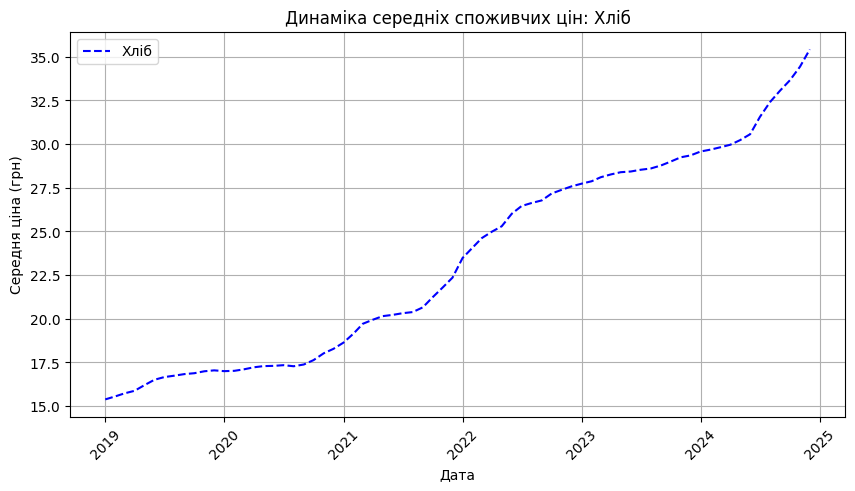


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –•–ª—ñ–± –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           16.371667
2020           17.410545
2021           20.382644
2022           25.873421
2023           28.524888
2024           31.696522


In [8]:
bread_categories = [
    "–•–ª—ñ–±", 
    "–•–ª—ñ–± –∂–∏—Ç–Ω—ñ–π, –∂–∏—Ç–Ω—å–æ-–ø—à–µ–Ω–∏—á–Ω–∏–π", 
    "–•–ª—ñ–± —ñ —Ö–ª—ñ–±–æ–ø—Ä–æ–¥—É–∫—Ç–∏", 
    "–•–ª—ñ–± –ø—à–µ–Ω–∏—á–Ω–∏–π –≤–∏—â–æ–≥–æ –≥–∞—Ç—É–Ω–∫—É", 
    "–•–ª—ñ–± –ø—à–µ–Ω–∏—á–Ω–∏–π –ø–µ—Ä—à–æ–≥–æ –≥–∞—Ç—É–Ω–∫—É", 
    "–ë–∞—Ç–æ–Ω"
]
analyze_avg_price(bread_categories, "–•–ª—ñ–±")

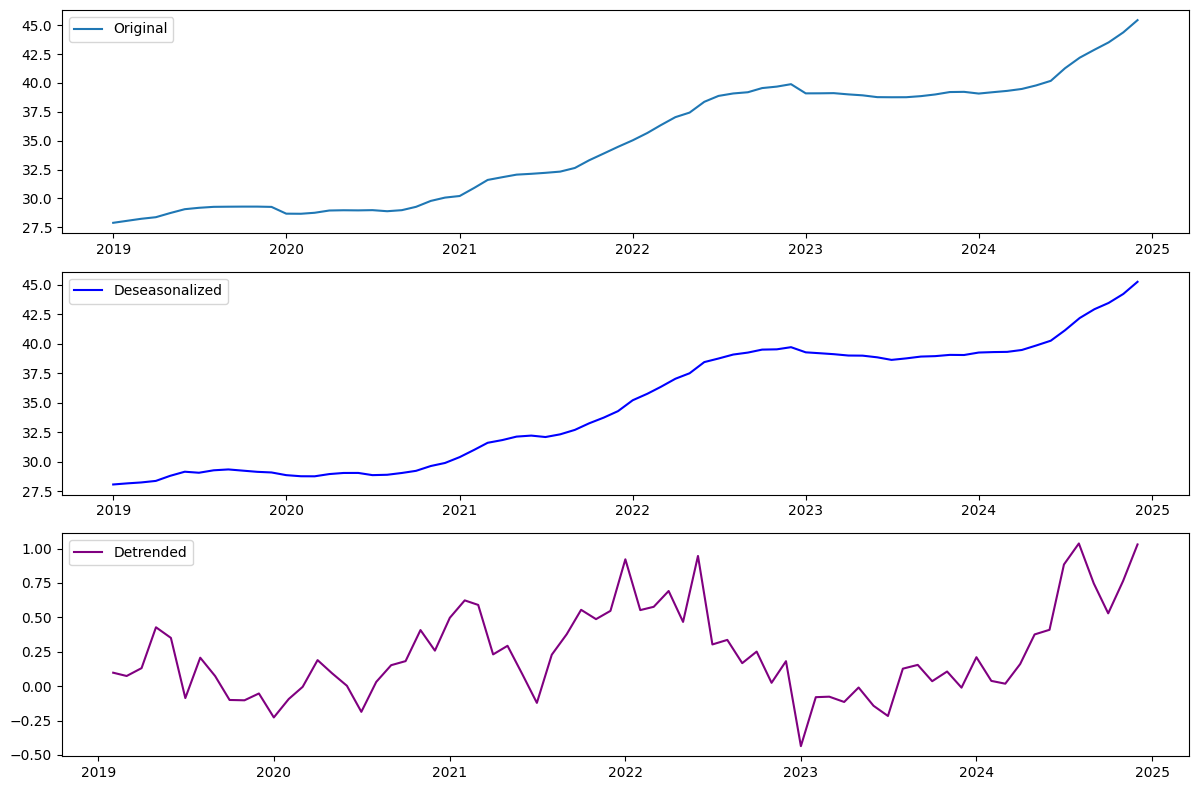

Original  Deseasonalized  Detrended
2019-02-01  28.079000       28.174920   0.097755
2019-03-01  28.243833       28.248783   0.073863
2019-04-01  28.381667       28.379738   0.130955
2019-05-01  28.737667       28.807667   0.427930
2019-06-01  29.074333       29.158442   0.350774

In [9]:
bread_categories = [
    "–•–ª—ñ–±", 
    "–•–ª—ñ–± –∂–∏—Ç–Ω—ñ–π, –∂–∏—Ç–Ω—å–æ-–ø—à–µ–Ω–∏—á–Ω–∏–π", 
    "–•–ª—ñ–± —ñ —Ö–ª—ñ–±–æ–ø—Ä–æ–¥—É–∫—Ç–∏", 
    "–•–ª—ñ–± –ø—à–µ–Ω–∏—á–Ω–∏–π –≤–∏—â–æ–≥–æ –≥–∞—Ç—É–Ω–∫—É", 
    "–•–ª—ñ–± –ø—à–µ–Ω–∏—á–Ω–∏–π –ø–µ—Ä—à–æ–≥–æ –≥–∞—Ç—É–Ω–∫—É", 
    "–ë–∞—Ç–æ–Ω"
]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)


df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

decomposition = sm.tsa.seasonal_decompose(df_prices, model='additive', period=12)

deseasonalized = df_prices - decomposition.seasonal

detrended = deseasonalized.diff()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Deseasonalized': deseasonalized, 'Detrended': detrended})
df_result.dropna().head()


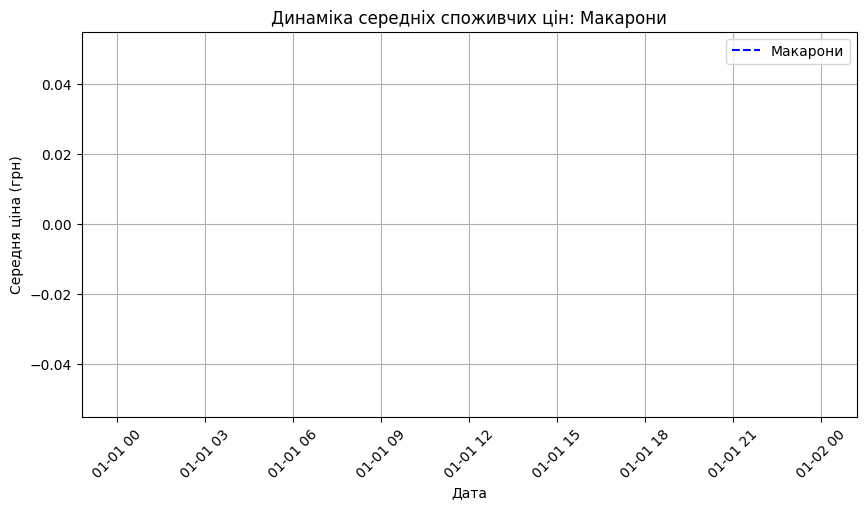


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ M–∞–∫–∞—Ä–æ–Ω–∏ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019                 NaN
2020                 NaN
2021                 NaN
2022                 NaN
2023                 NaN
2024                 NaN


In [10]:
pasta_categories = ["–ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏", "–ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏ –∑ –º‚Äô—è–∫–∏—Ö —Å–æ—Ä—Ç—ñ–≤ –ø—à–µ–Ω–∏—Ü—ñ"]
analyze_avg_price(pasta_categories, "M–∞–∫–∞—Ä–æ–Ω–∏")

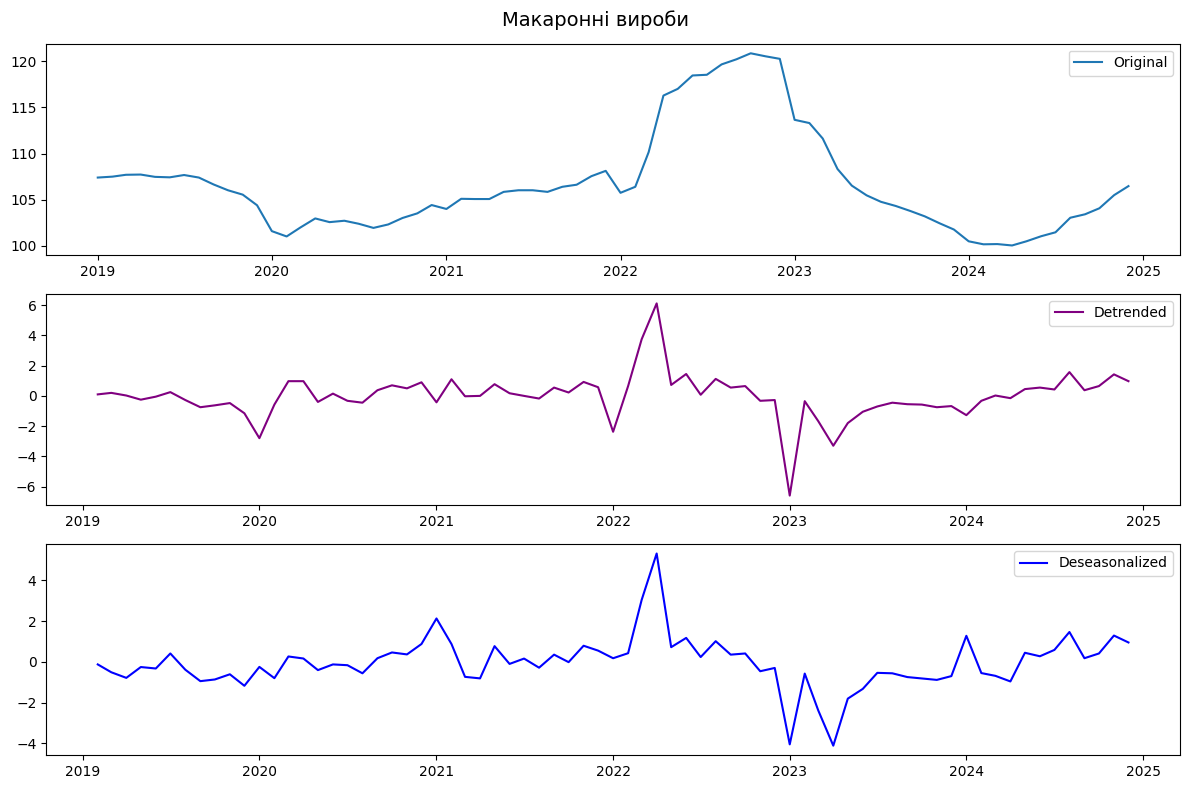

Original  Detrended  Deseasonalized
2019-02-01   107.500      0.100       -0.124006
2019-03-01   107.700      0.200       -0.509214
2019-04-01   107.725      0.025       -0.784214
2019-05-01   107.475     -0.250       -0.252756
2019-06-01   107.425     -0.050       -0.324214

In [11]:
bread_categories = ["–ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏", "–ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏ –∑ –º‚Äô—è–∫–∏—Ö —Å–æ—Ä—Ç—ñ–≤ –ø—à–µ–Ω–∏—Ü—ñ"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

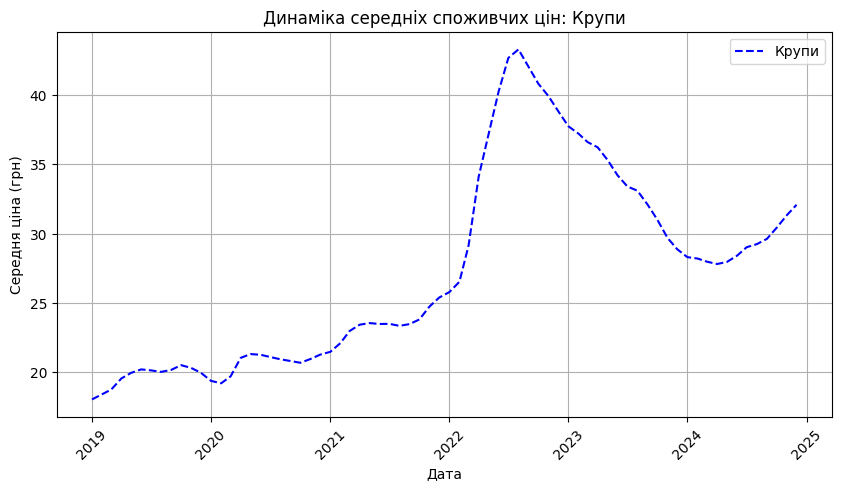


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ö—Ä—É–ø–∏ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           19.672045
2020           20.638308
2021           23.438859
2022           36.705929
2023           33.790019
2024           29.196404


In [12]:
groats_categories = ["–†–∏—Å", "–ö—Ä—É–ø–∏ –≥—Ä–µ—á–∞–Ω—ñ", "–ö—Ä—É–ø–∏ –º–∞–Ω–Ω—ñ", "–ö—Ä—É–ø–∏ —è—á–Ω—ñ", "–ü—à–æ–Ω–æ"]
analyze_avg_price(groats_categories, "–ö—Ä—É–ø–∏")

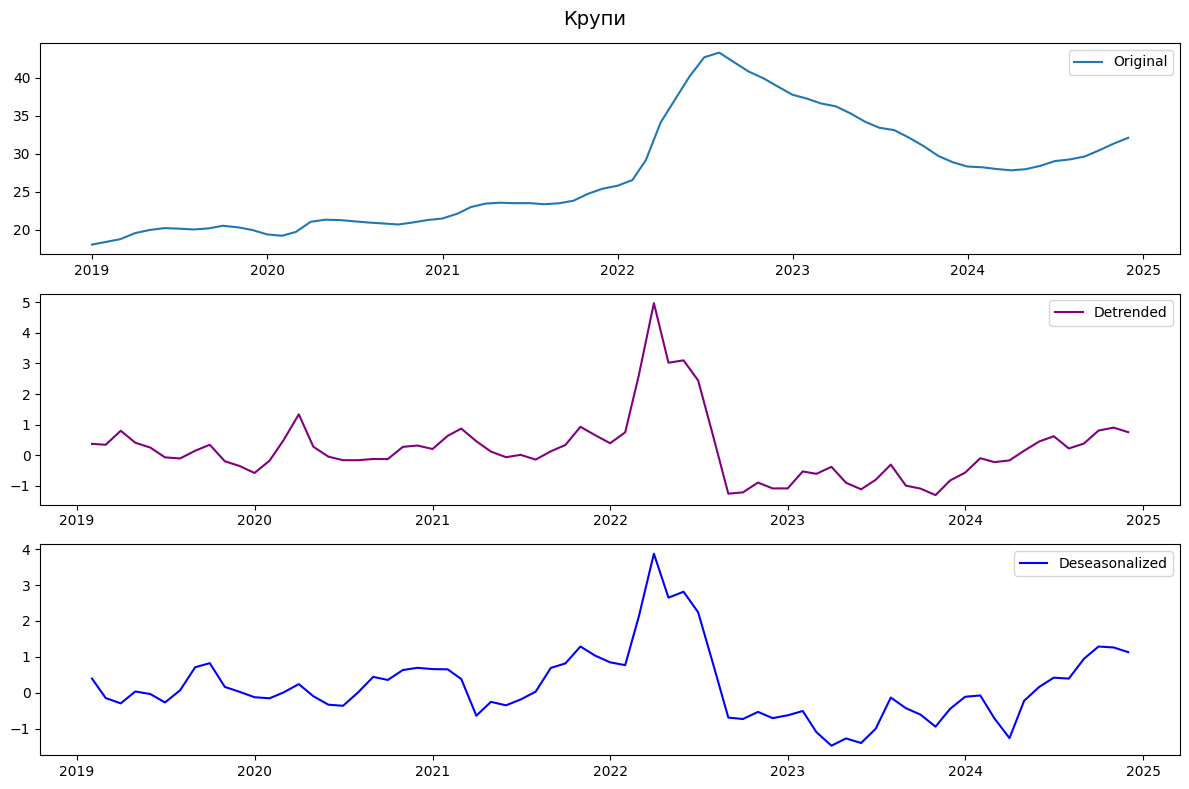

Original  Detrended  Deseasonalized
2019-02-01  18.413769   0.370000        0.392381
2019-03-01  18.754692   0.340923       -0.146970
2019-04-01  19.553000   0.798308       -0.297146
2019-05-01  19.959923   0.406923        0.035100
2019-06-01  20.207538   0.247615       -0.037720

In [13]:
bread_categories = ["–†–∏—Å", "–ö—Ä—É–ø–∏ –≥—Ä–µ—á–∞–Ω—ñ", "–ö—Ä—É–ø–∏ –º–∞–Ω–Ω—ñ", "–ö—Ä—É–ø–∏ —è—á–Ω—ñ", "–ü—à–æ–Ω–æ"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ö—Ä—É–ø–∏", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

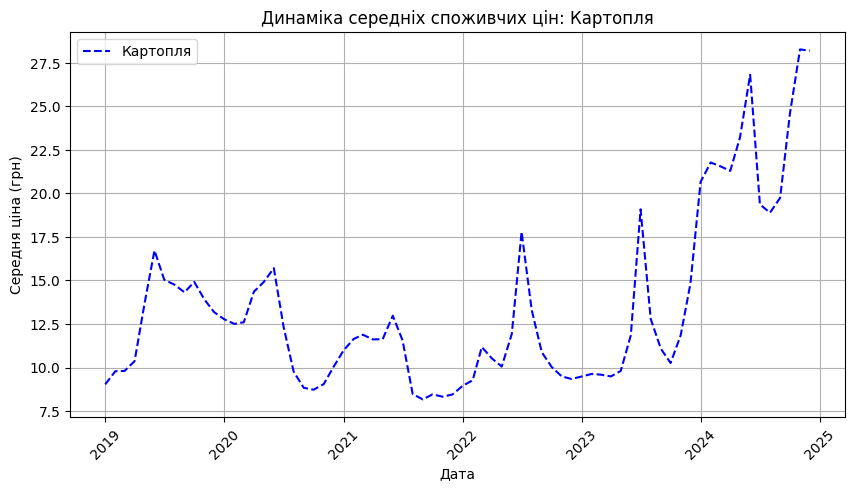


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ö–∞—Ä—Ç–æ–ø–ª—è –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           12.955865
2020           11.798237
2021           10.347468
2022           11.062484
2023           11.647051
2024           22.867692


In [14]:
potato_categories = ["–ö–∞—Ä—Ç–æ–ø–ª—è"]
analyze_avg_price(potato_categories, "–ö–∞—Ä—Ç–æ–ø–ª—è")

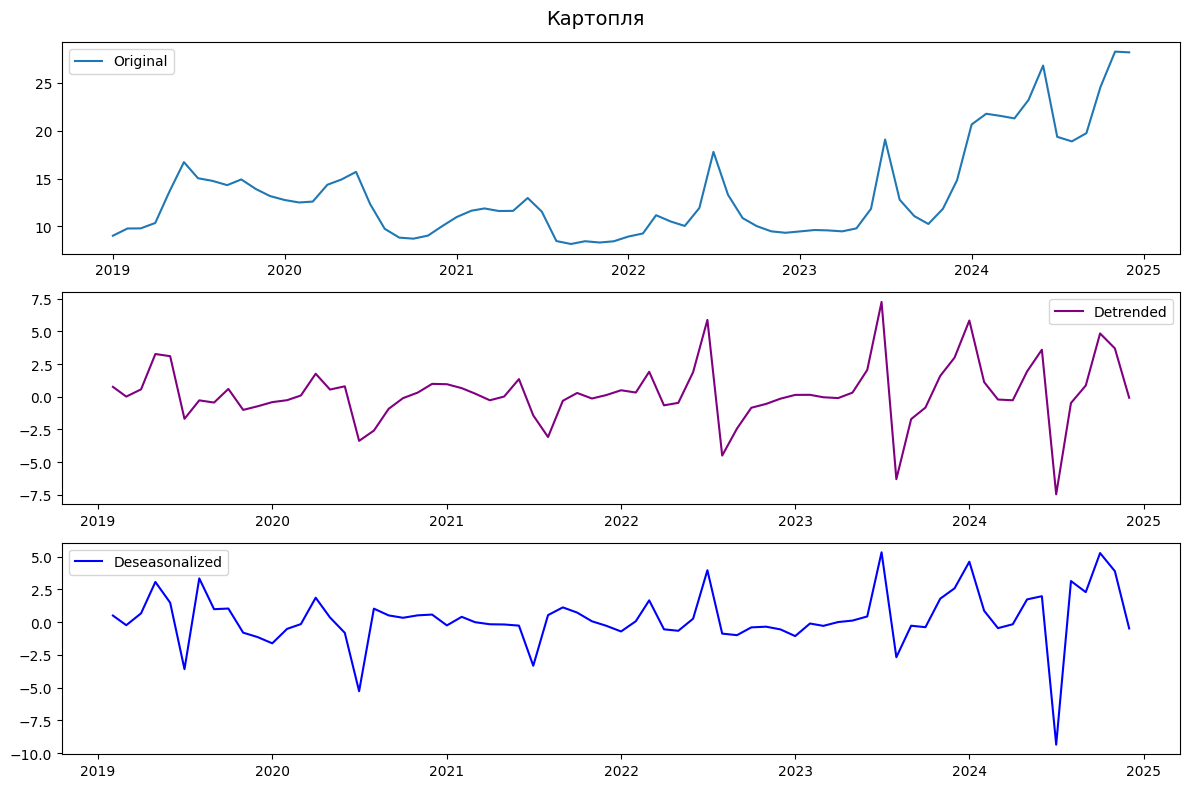

Original  Detrended  Deseasonalized
2019-02-01   9.789231   0.755385        0.505544
2019-03-01   9.800769   0.011538       -0.231677
2019-04-01  10.365000   0.564231        0.673929
2019-05-01  13.626923   3.261923        3.069586
2019-06-01  16.723846   3.096923        1.486714

In [15]:
bread_categories = ["–ö–∞—Ä—Ç–æ–ø–ª—è"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")


detrended = df_prices.diff()


decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ö–∞—Ä—Ç–æ–ø–ª—è", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

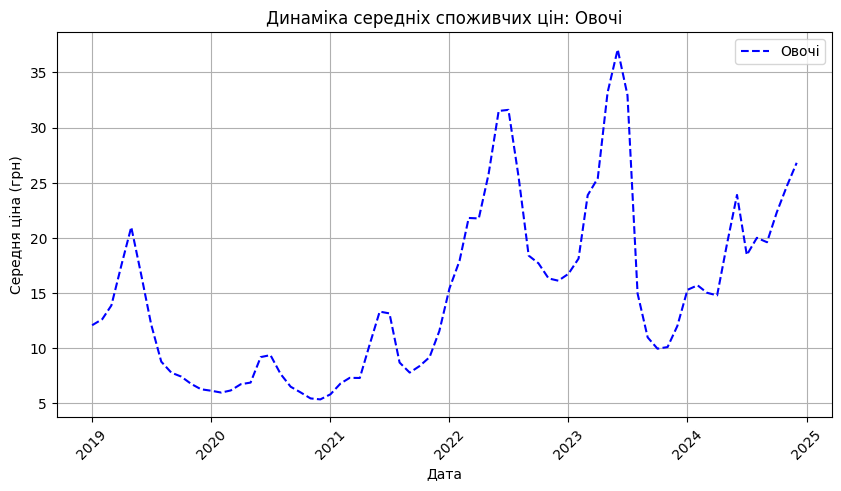


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –û–≤–æ—á—ñ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           11.886912
2020            6.761966
2021            9.111432
2022           21.643745
2023           20.434006
2024           19.651667


In [16]:
vegetables_categories = [
    "–ë—É—Ä—è–∫", 
    "–ö–∞–ø—É—Å—Ç–∞ –±—ñ–ª–æ–∫–∞—á–∞–Ω–Ω–∞", 
    "–ú–æ—Ä–∫–≤–∞"
]
analyze_avg_price(vegetables_categories, "–û–≤–æ—á—ñ")

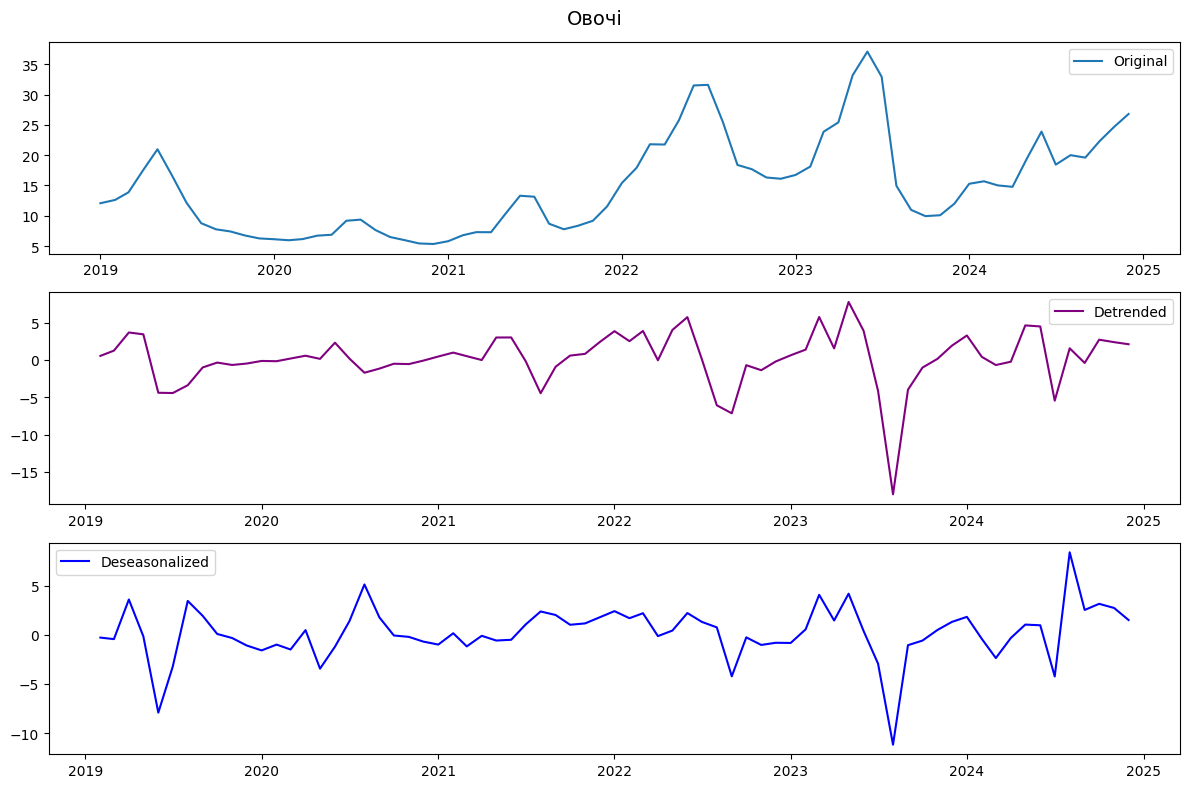

Original  Detrended  Deseasonalized
2019-02-01  12.607308   0.545641       -0.281132
2019-03-01  13.854487   1.247179       -0.437318
2019-04-01  17.534231   3.679744        3.590664
2019-05-01  20.966795   3.432564       -0.154439
2019-06-01  16.573590  -4.393205       -7.911441

In [17]:
bread_categories = [
    "–ë—É—Ä—è–∫", 
    "–ö–∞–ø—É—Å—Ç–∞ –±—ñ–ª–æ–∫–∞—á–∞–Ω–Ω–∞", 
    "–ú–æ—Ä–∫–≤–∞"
]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")


detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–û–≤–æ—á—ñ", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

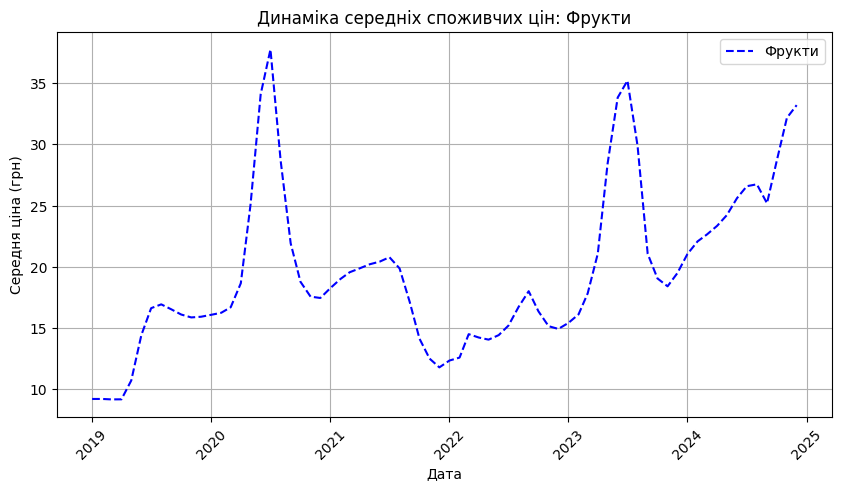


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –§—Ä—É–∫—Ç–∏ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           13.334840
2020           22.426827
2021           17.804455
2022           14.884968
2023           22.983910
2024           25.959167


In [18]:
fruits_categories = ["–§—Ä—É–∫—Ç–∏", "–Ø–±–ª—É–∫–∞"]
analyze_avg_price(fruits_categories, "–§—Ä—É–∫—Ç–∏")

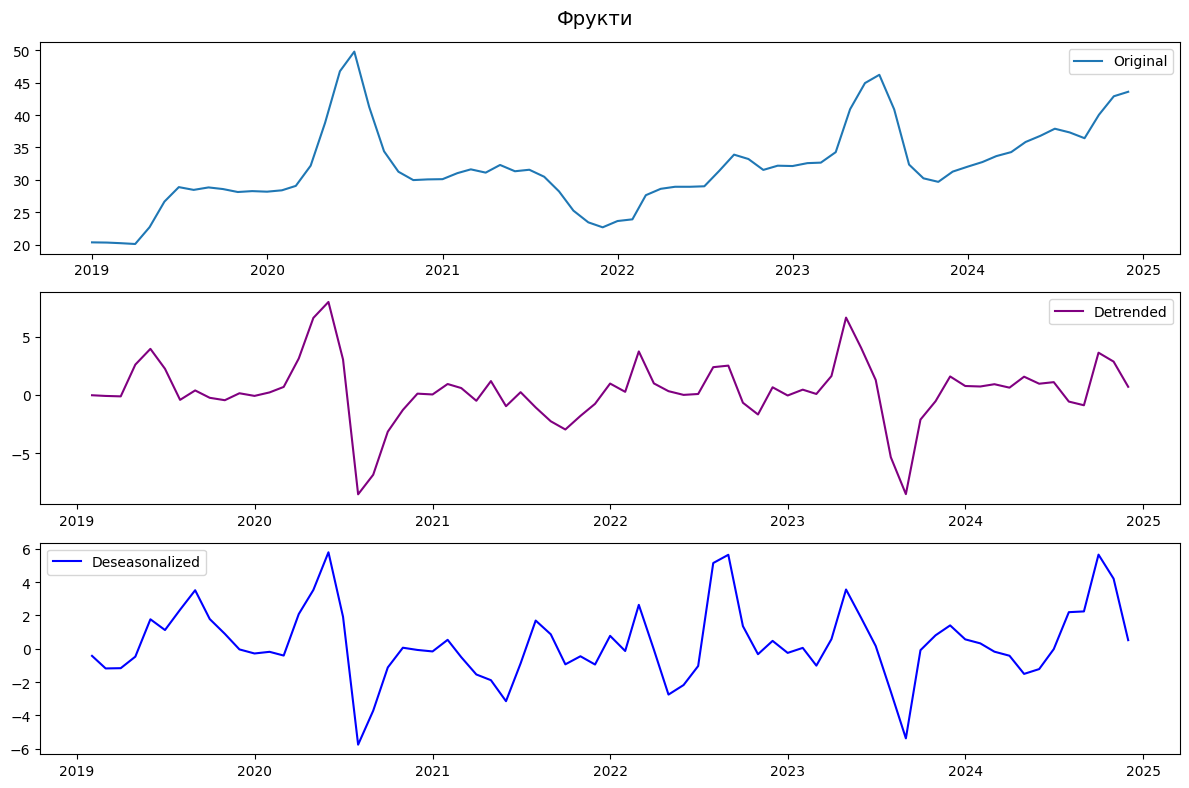

Original  Detrended  Deseasonalized
2019-02-01  20.326333  -0.032000       -0.430169
2019-03-01  20.235000  -0.091333       -1.183714
2019-04-01  20.107333  -0.127667       -1.168547
2019-05-01  22.700667   2.593333       -0.477344
2019-06-01  26.645333   3.944667        1.765656

In [19]:
bread_categories = ["–§—Ä—É–∫—Ç–∏", "–Ø–±–ª—É–∫–∞"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–§—Ä—É–∫—Ç–∏", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

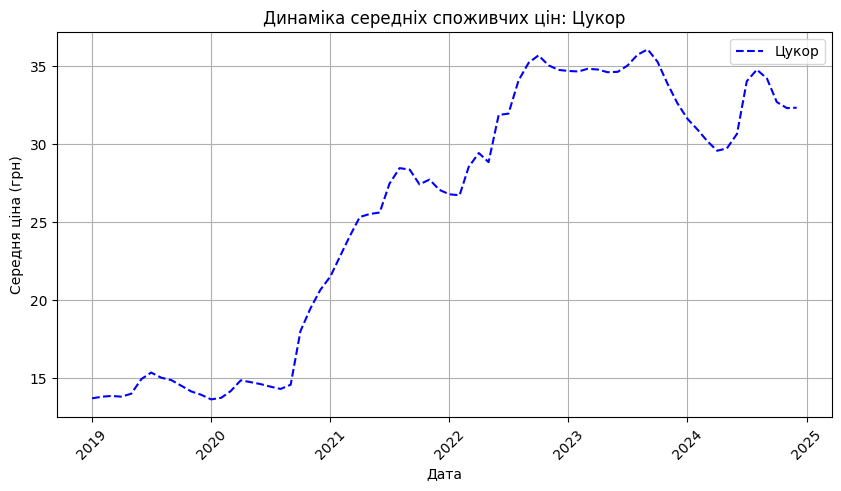


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –¶—É–∫–æ—Ä –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           14.350801
2020           15.623526
2021           25.970962
2022           31.592772
2023           34.747917
2024           31.936635


In [20]:
sugar_categories = ["–¶—É–∫–æ—Ä"]
analyze_avg_price(sugar_categories, "–¶—É–∫–æ—Ä")

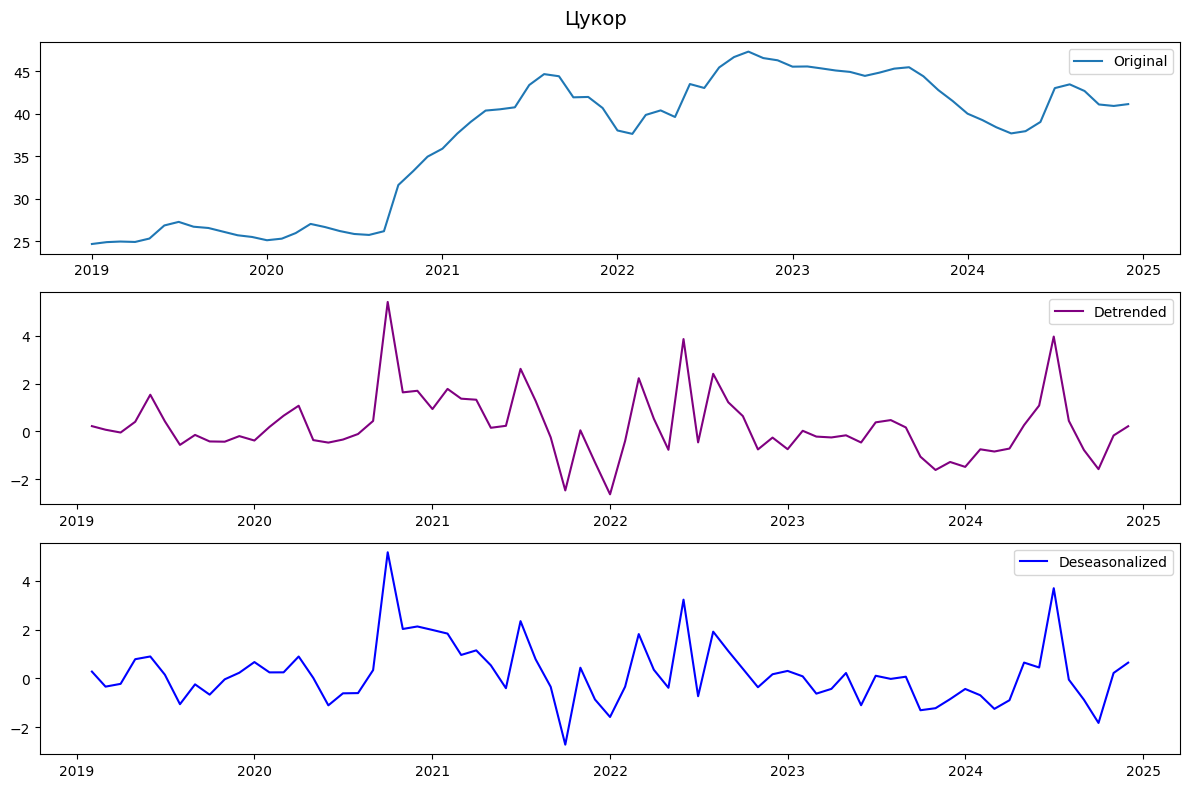

Original  Detrended  Deseasonalized
2019-02-01  24.920333   0.219333        0.278689
2019-03-01  24.989000   0.068667       -0.338720
2019-04-01  24.940000  -0.049000       -0.224847
2019-05-01  25.341000   0.401000        0.786917
2019-06-01  26.875667   1.534667        0.899225

In [21]:
bread_categories = ["–¶—É–∫–æ—Ä"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–¶—É–∫–æ—Ä", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

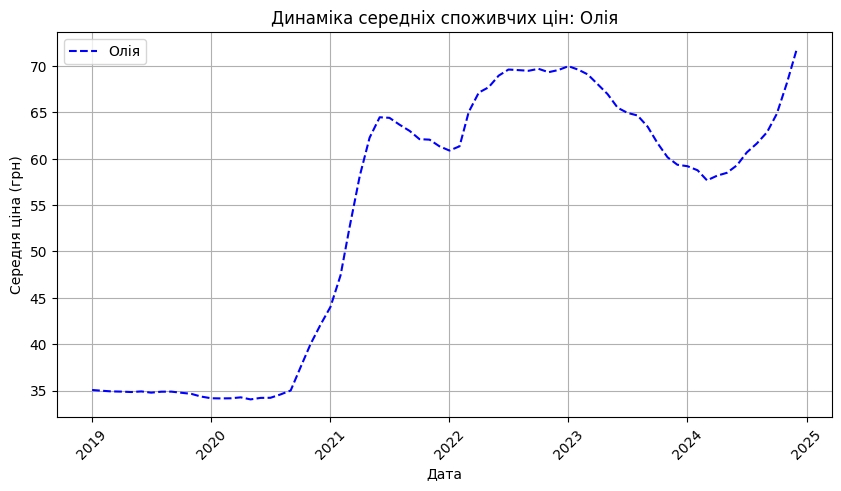


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –û–ª—ñ—è –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           34.820609
2020           35.696474
2021           58.792051
2022           67.347051
2023           65.272308
2024           61.785032


In [22]:
oil_categories = ["–û–ª—ñ—è —Å–æ–Ω—è—à–Ω–∏–∫–æ–≤–∞", "–û–ª—ñ—è —Ç–∞ –∂–∏—Ä–∏"]
analyze_avg_price(oil_categories, "–û–ª—ñ—è")

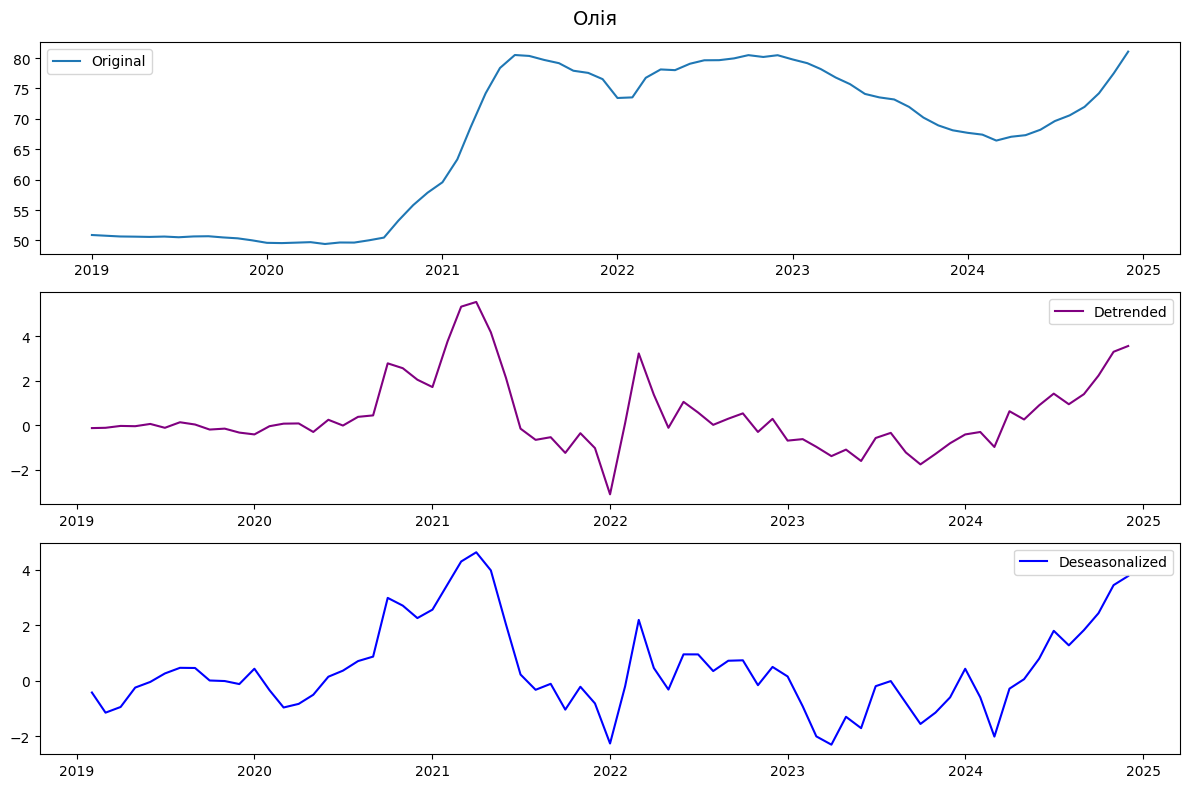

Original  Detrended  Deseasonalized
2019-02-01  50.763529  -0.127353       -0.421614
2019-03-01  50.649412  -0.114118       -1.146420
2019-04-01  50.619412  -0.030000       -0.942295
2019-05-01  50.576765  -0.042647       -0.243947
2019-06-01  50.635882   0.059118       -0.040550

In [23]:
bread_categories = ["–û–ª—ñ—è —Å–æ–Ω—è—à–Ω–∏–∫–æ–≤–∞", "–û–ª—ñ—è —Ç–∞ –∂–∏—Ä–∏"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–û–ª—ñ—è", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

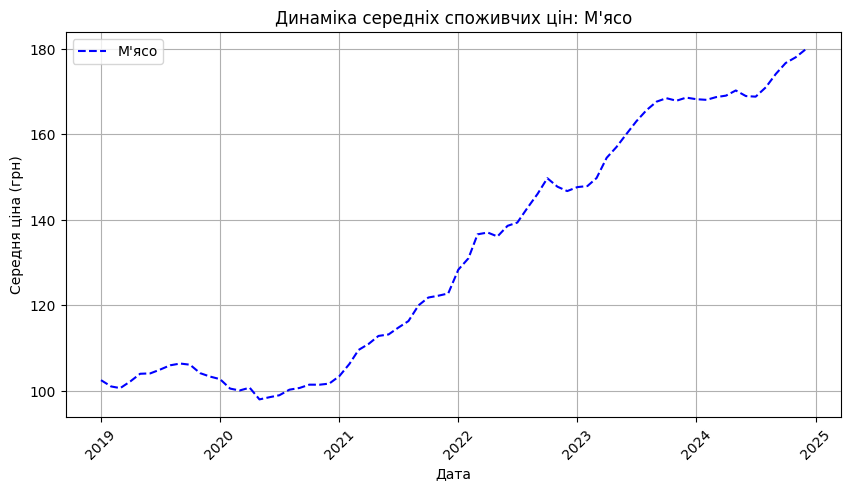


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ú'—è—Å–æ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019          103.765457
2020          100.407596
2021          114.511795
2022          140.003466
2023          159.847452
2024          171.812316


In [24]:
meat_categories = ["–ü—Ç–∏—Ü—è (—Ç—É—à–∫–∏ –∫—É—Ä—è—á—ñ)", "–°–≤–∏–Ω–∏–Ω–∞", "–§—ñ–ª–µ –∫—É—Ä—è—á–µ", "–Ø–ª–æ–≤–∏—á–∏–Ω–∞"]
analyze_avg_price(meat_categories, "–ú'—è—Å–æ")

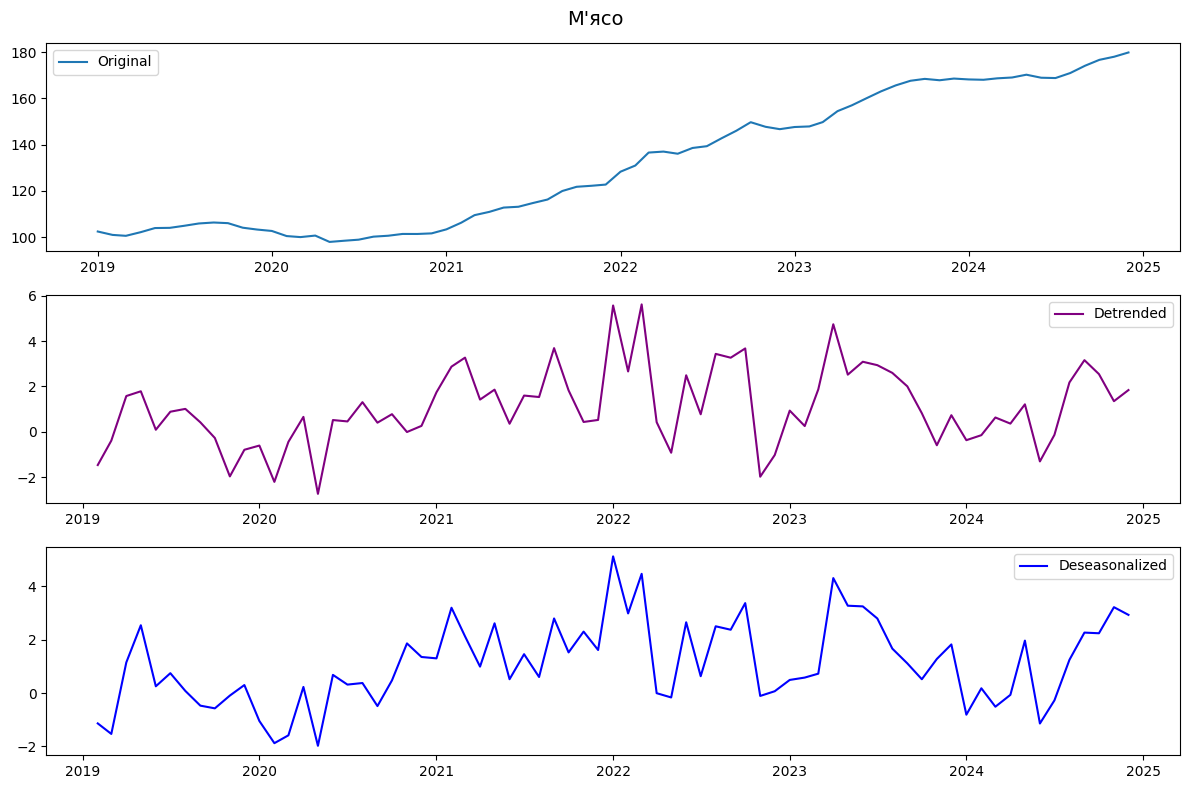

Original  Detrended  Deseasonalized
2019-02-01  101.013654  -1.468750       -1.136245
2019-03-01  100.620769  -0.392885       -1.530733
2019-04-01  102.194808   1.574038        1.151002
2019-05-01  103.978269   1.783462        2.546115
2019-06-01  104.065769   0.087500        0.256246

In [25]:
bread_categories = ["–ü—Ç–∏—Ü—è (—Ç—É—à–∫–∏ –∫—É—Ä—è—á—ñ)", "–°–≤–∏–Ω–∏–Ω–∞", "–§—ñ–ª–µ –∫—É—Ä—è—á–µ", "–Ø–ª–æ–≤–∏—á–∏–Ω–∞"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ú'—è—Å–æ", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

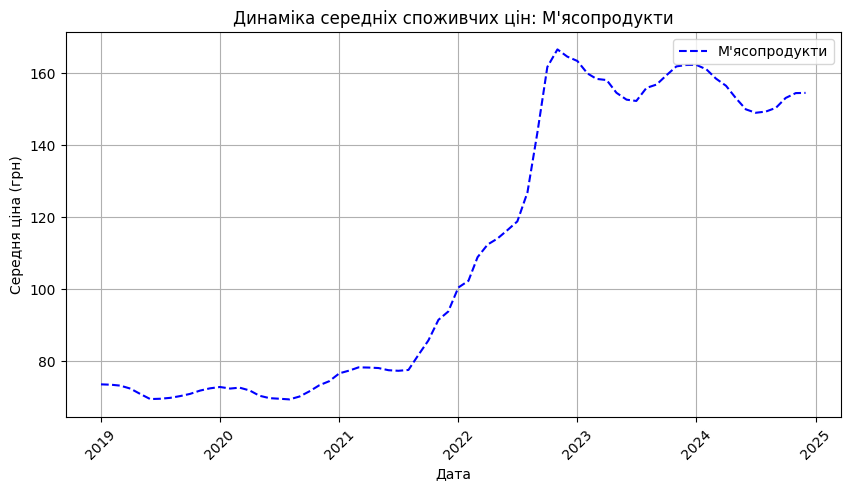


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ú'—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           71.309519
2020           71.351442
2021           80.986955
2022          127.995417
2023          157.927500
2024          154.307115


In [26]:
meatprodut_categories = ["–ö–æ–≤–±–∞—Å–∏ –≤–∞—Ä–µ–Ω—ñ –ø–µ—Ä—à–æ–≥–æ “ë–∞—Ç—É–Ω–∫—É", "–ú‚Äô—è—Å–æ —Ç–∞ –º‚Äô—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏", "–°–∞–ª–æ"]
analyze_avg_price(meatprodut_categories, "–ú'—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏")

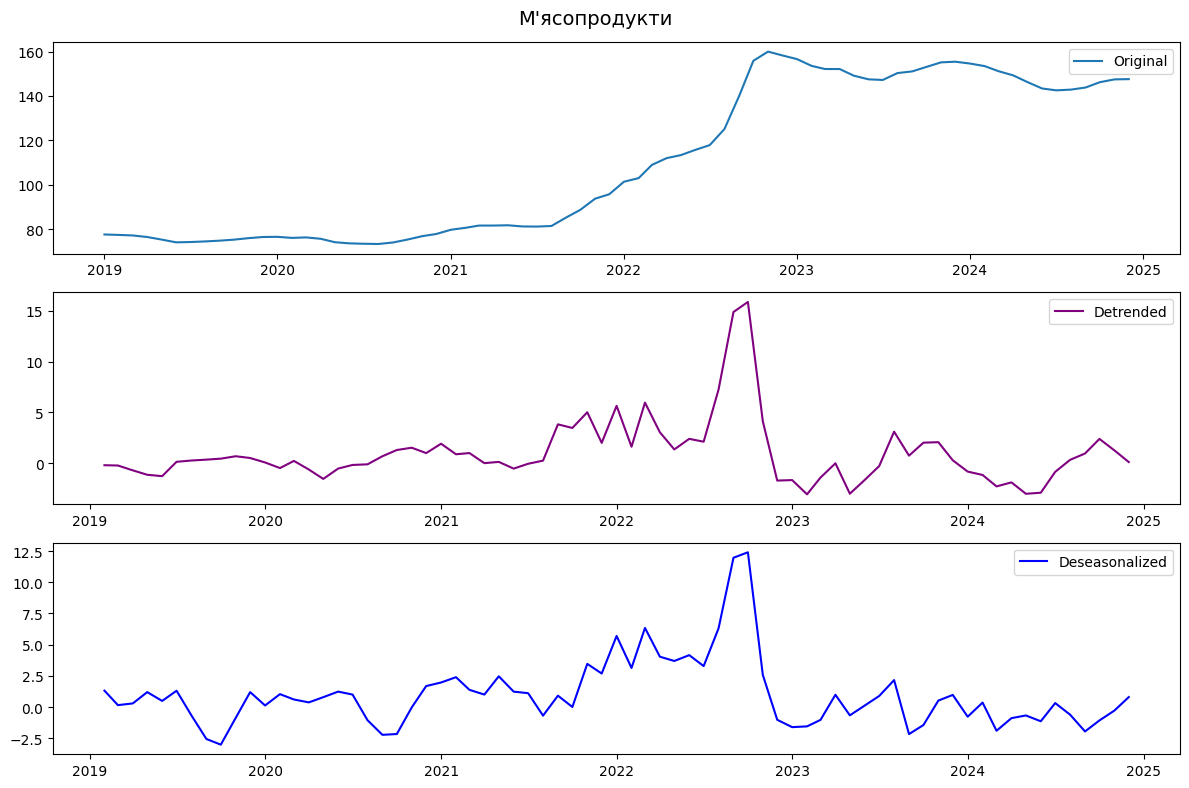

Original  Detrended  Deseasonalized
2019-02-01  77.331667  -0.197000        1.314157
2019-03-01  77.105333  -0.226333        0.152424
2019-04-01  76.402333  -0.703000        0.289635
2019-05-01  75.264667  -1.137667        1.195724
2019-06-01  73.991333  -1.273333        0.489349

In [27]:
bread_categories = ["–ö–æ–≤–±–∞—Å–∏ –≤–∞—Ä–µ–Ω—ñ –ø–µ—Ä—à–æ–≥–æ “ë–∞—Ç—É–Ω–∫—É", "–ú‚Äô—è—Å–æ —Ç–∞ –º‚Äô—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏", "–°–∞–ª–æ"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ú'—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

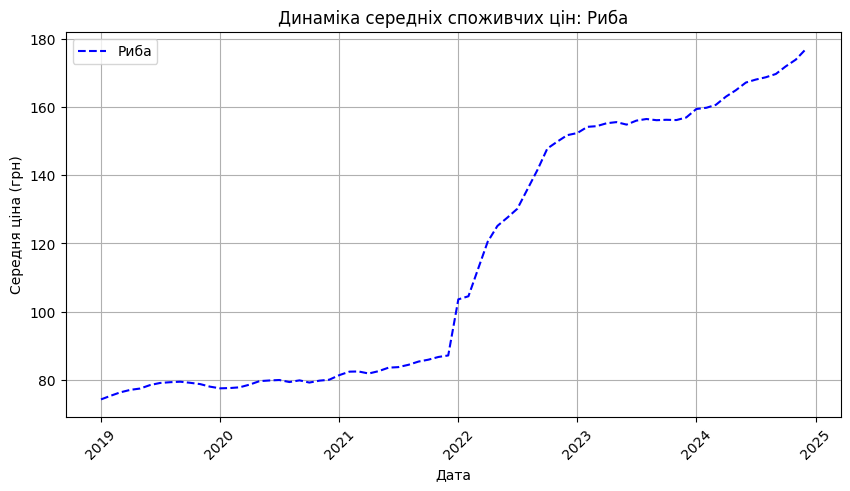


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –†–∏–±–∞ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           77.749776
2020           79.115160
2021           83.973077
2022          129.187163
2023          155.328173
2024          166.944583


In [28]:
fish_categories = ["–†–∏–±–∞ –º–æ—Ä–æ–∂–µ–Ω–∞", "–†–∏–±–∞ —Ç–∞ –ø—Ä–æ–¥—É–∫—Ç–∏ –∑ —Ä–∏–±–∏"]
analyze_avg_price(fish_categories, "–†–∏–±–∞")

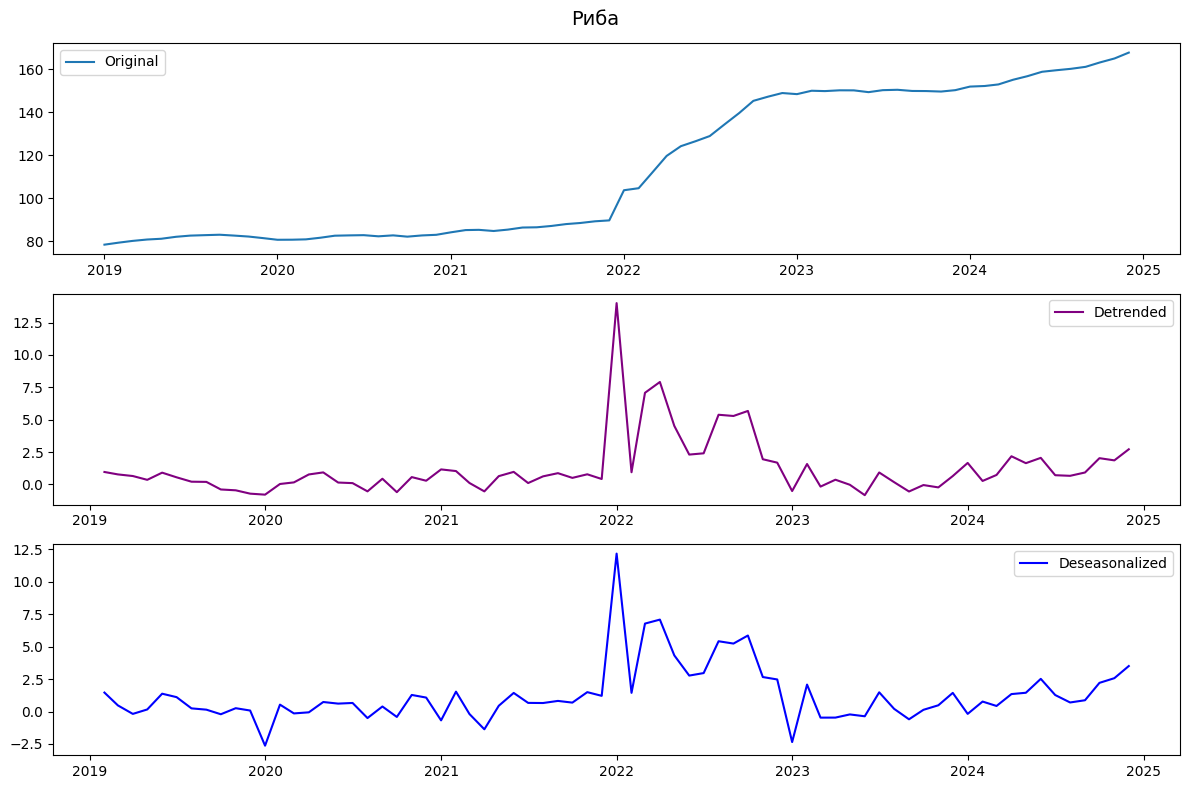

Original  Detrended  Deseasonalized
2019-02-01  79.449667   0.962000        1.459893
2019-03-01  80.224333   0.774667        0.470729
2019-04-01  80.874333   0.650000       -0.182538
2019-05-01  81.230000   0.355667        0.158948
2019-06-01  82.140000   0.910000        1.372979

In [29]:
bread_categories =  ["–†–∏–±–∞ –º–æ—Ä–æ–∂–µ–Ω–∞", "–†–∏–±–∞ —Ç–∞ –ø—Ä–æ–¥—É–∫—Ç–∏ –∑ —Ä–∏–±–∏"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–†–∏–±–∞", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

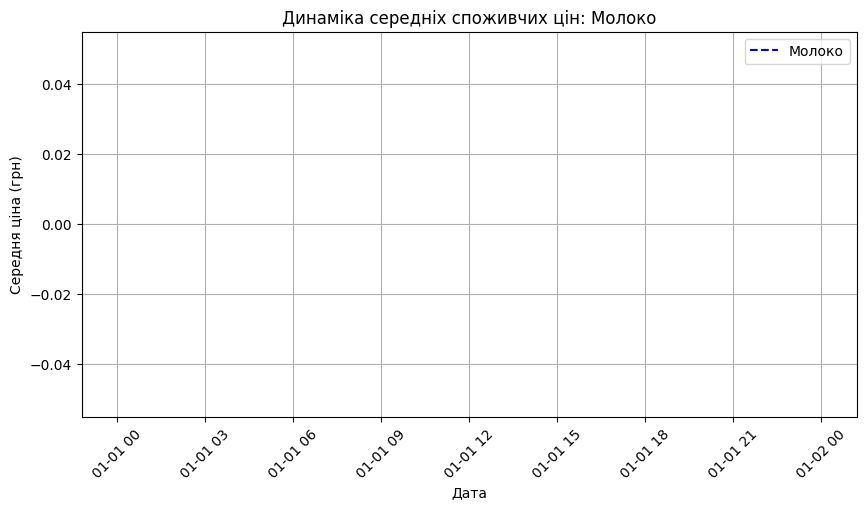


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ú–æ–ª–æ–∫–æ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019                 NaN
2020                 NaN
2021                 NaN
2022                 NaN
2023                 NaN
2024                 NaN


In [30]:
milk_categories = ["–ú–æ–ª–æ–∫–æ", "–ú–æ–ª–æ–∫–æ –ø–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω–µ –∂–∏—Ä–Ω—ñ—Å—Ç—é –¥–æ 2,6% –≤–∫–ª—é—á–Ω–æ"]
analyze_avg_price(milk_categories, "–ú–æ–ª–æ–∫–æ")

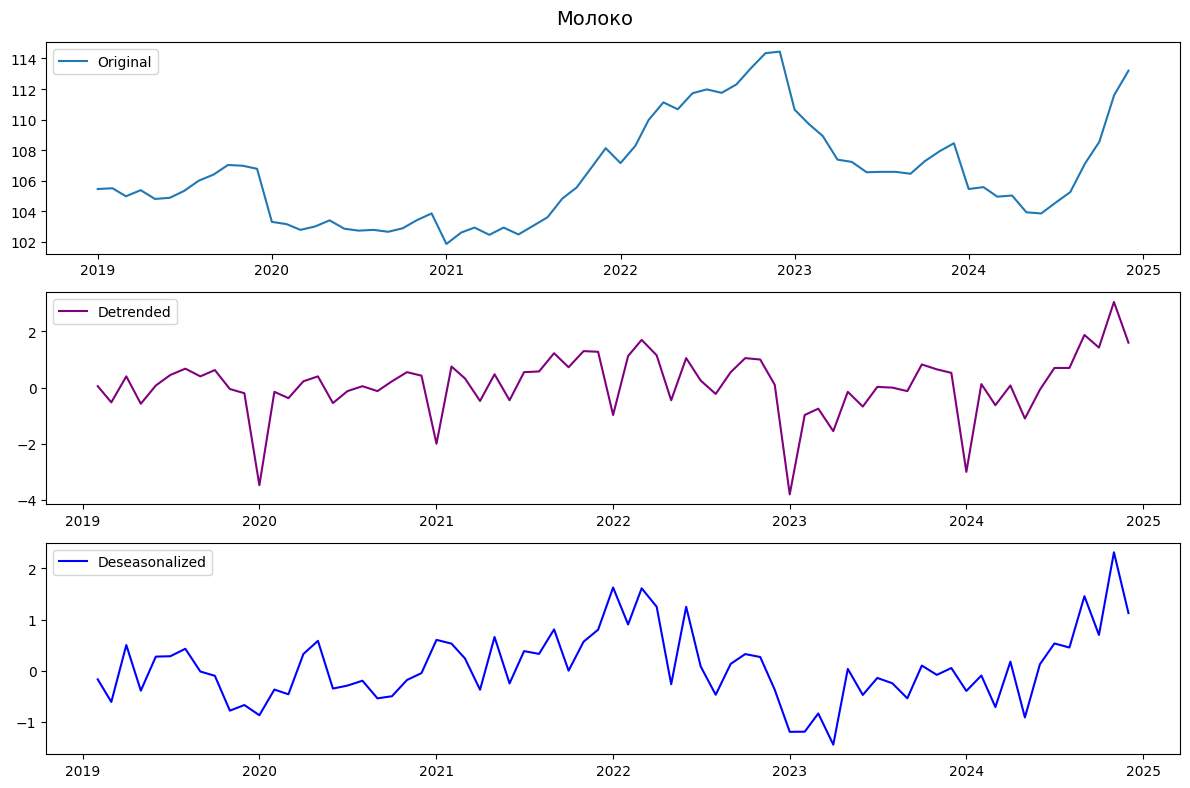

Original  Detrended  Deseasonalized
2019-02-01   105.500      0.050       -0.171532
2019-03-01   104.975     -0.525       -0.614032
2019-04-01   105.375      0.400        0.499926
2019-05-01   104.800     -0.575       -0.392574
2019-06-01   104.875      0.075        0.273260

In [31]:
bread_categories = ["–ú–æ–ª–æ–∫–æ", "–ú–æ–ª–æ–∫–æ –ø–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω–µ –∂–∏—Ä–Ω—ñ—Å—Ç—é –¥–æ 2,6% –≤–∫–ª—é—á–Ω–æ"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ú–æ–ª–æ–∫–æ", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

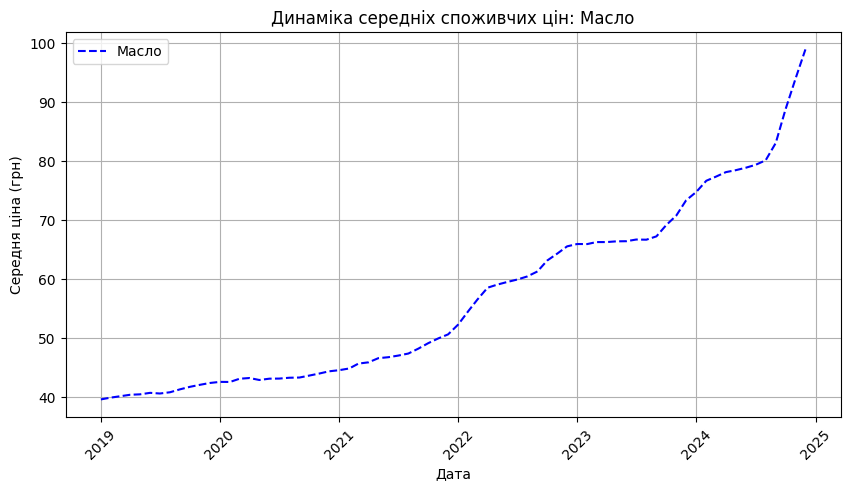


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ú–∞—Å–ª–æ –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           40.836186
2020           43.258013
2021           47.215673
2022           59.603670
2023           67.604167
2024           82.398846


In [32]:
butter_categories = ["–ú–∞—Å–ª–æ", "–ú–∞—Å–ª–æ –≤–µ—Ä—à–∫–æ–≤–µ"]
analyze_avg_price(butter_categories, "–ú–∞—Å–ª–æ")

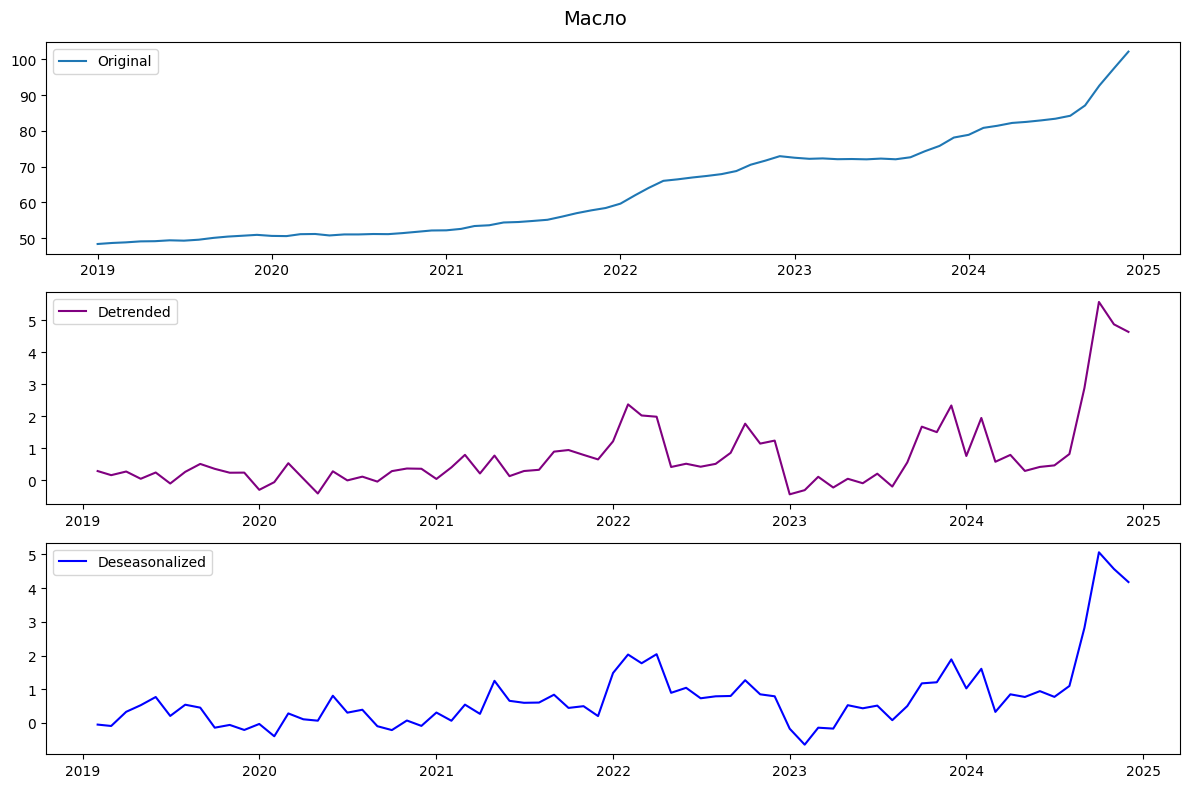

Original  Detrended  Deseasonalized
2019-02-01  48.679667   0.291667       -0.048043
2019-03-01  48.843333   0.163667       -0.089124
2019-04-01  49.120333   0.277000        0.331476
2019-05-01  49.171000   0.050667        0.526851
2019-06-01  49.417333   0.246333        0.769985

In [33]:
bread_categories = ["–ú–∞—Å–ª–æ", "–ú–∞—Å–ª–æ –≤–µ—Ä—à–∫–æ–≤–µ"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–ú–∞—Å–ª–æ", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

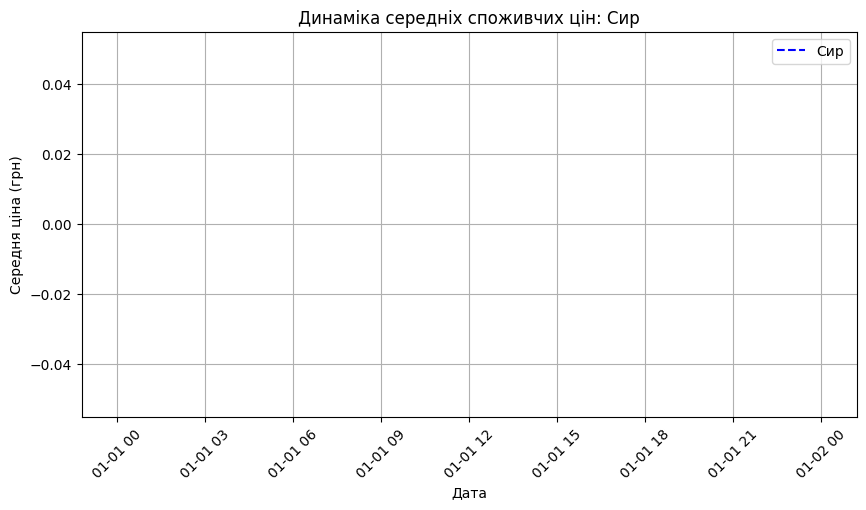


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –°–∏—Ä –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019                 NaN
2020                 NaN
2021                 NaN
2022                 NaN
2023                 NaN
2024                 NaN


In [34]:
cheese_categories = ["–°–∏—Ä–∏ –º‚Äô—è–∫—ñ –∂–∏—Ä–Ω—ñ", "–°–∏—Ä —ñ –º‚Äô—è–∫–∏–π —Å–∏—Ä (—Ç–≤–æ—Ä–æ–≥)"]
analyze_avg_price(cheese_categories, "–°–∏—Ä")

In [35]:
bread_categories = ["–°–∏—Ä–∏ –º‚Äô—è–∫—ñ –∂–∏—Ä–Ω—ñ", "–°–∏—Ä —ñ –º‚Äô—è–∫–∏–π —Å–∏—Ä (—Ç–≤–æ—Ä–æ–≥)"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–°–∏—Ä", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)

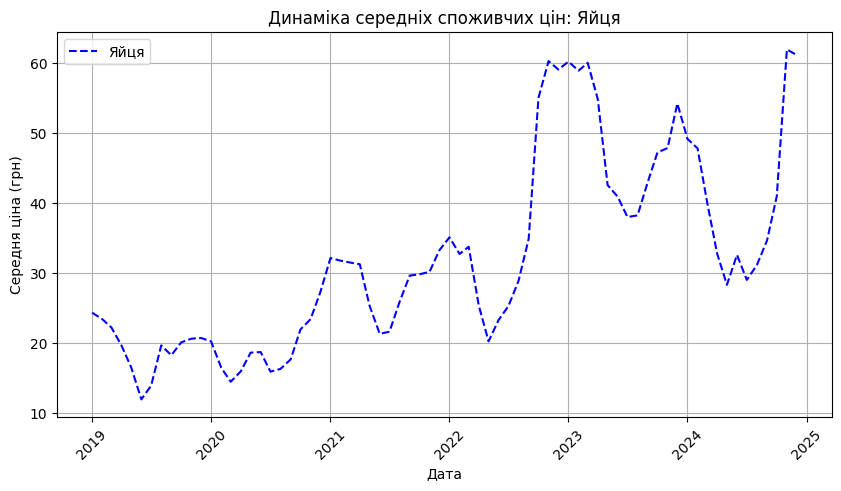


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –Ø–π—Ü—è –ø–æ —Ä–æ–∫–∞—Ö:

      –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)
2019           19.293397
2020           18.928686
2021           28.665545
2022           36.190449
2023           48.871795
2024           40.844968


In [ ]:
egg_categories = ["–Ø–π—Ü—è"]
analyze_avg_price(egg_categories, "–Ø–π—Ü—è")

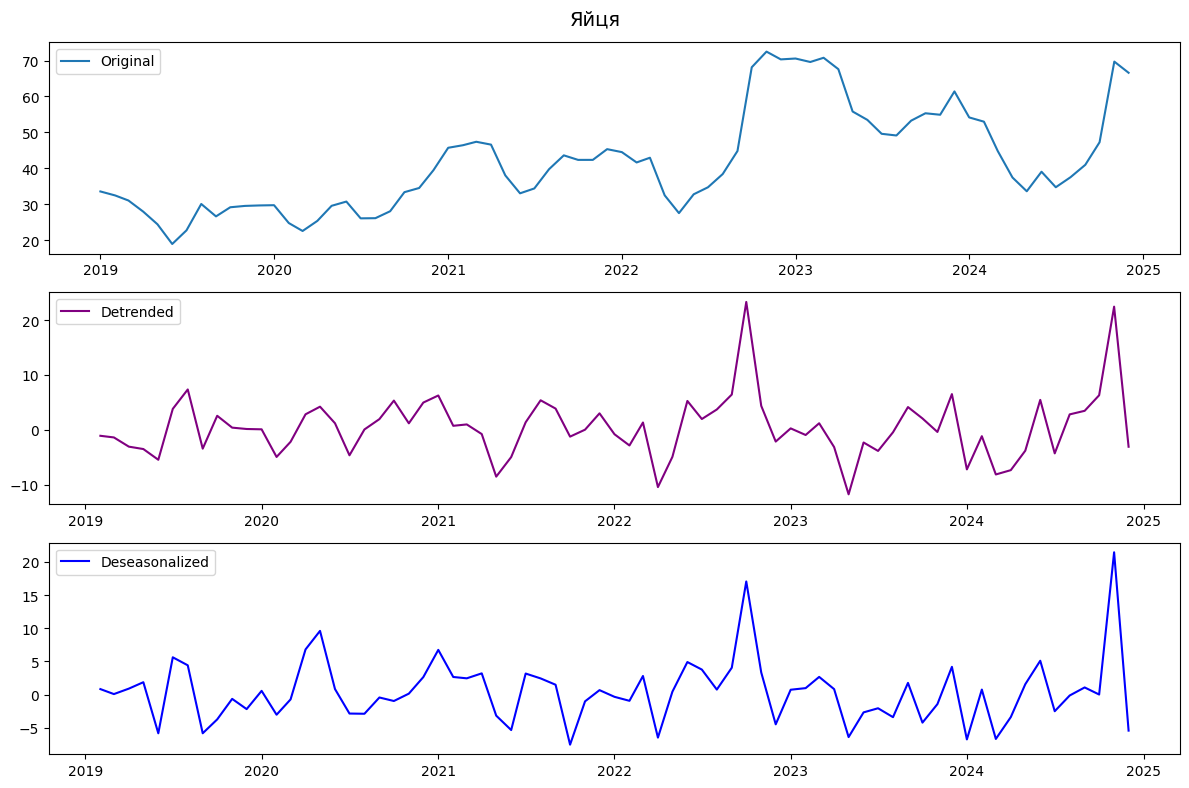

Original  Detrended  Deseasonalized
2019-02-01  32.455000  -1.111333        0.839690
2019-03-01  31.044333  -1.410667        0.088023
2019-04-01  27.952333  -3.092000        0.911140
2019-05-01  24.423667  -3.528667        1.875554
2019-06-01  18.938667  -5.485000       -5.817741

In [ ]:
bread_categories = ["–Ø–π—Ü—è"]

df_bread = df[df['–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("–Ø–π—Ü—è", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

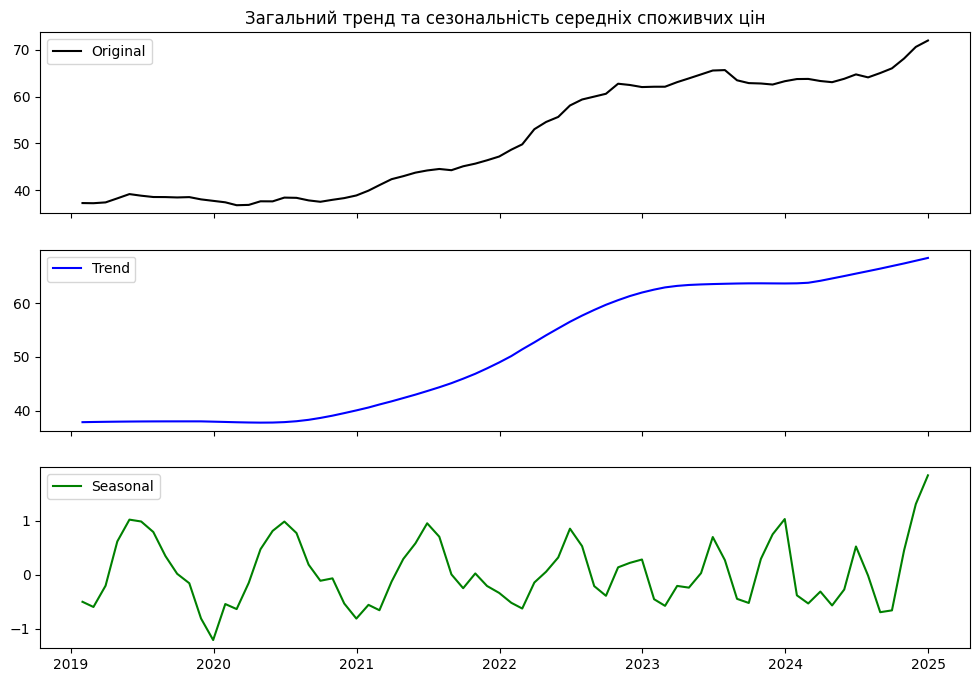

In [ ]:
df_prices = df[df["–ü–æ–∫–∞–∑–Ω–∏–∫"] == "–°–µ—Ä–µ–¥–Ω—ñ —Å–ø–æ–∂–∏–≤—á—ñ —Ü—ñ–Ω–∏ –Ω–∞ —Ç–æ–≤–∞—Ä–∏ (–ø–æ—Å–ª—É–≥–∏)"]

date_columns = df.columns[5:]

df_mean = df_prices[date_columns].mean()

df_mean.index = pd.date_range(start='2019-01', periods=len(df_mean), freq='M')

stl = STL(df_mean, period=12, seasonal=13)
res = stl.fit()

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df_mean, label="Original", color="black")
axes[0].set_title("–ó–∞–≥–∞–ª—å–Ω–∏–π —Ç—Ä–µ–Ω–¥ —Ç–∞ —Å–µ–∑–æ–Ω–∞–ª—å–Ω—ñ—Å—Ç—å —Å–µ—Ä–µ–¥–Ω—ñ—Ö —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω")
axes[0].legend()

axes[1].plot(res.trend, label="Trend", color="blue")
axes[1].legend()

axes[2].plot(res.seasonal, label="Seasonal", color="green")
axes[2].legend()

plt.show()

- Rising trend ‚Üí increasing prices over time.
- Regular peaks/drops indicate seasonal price fluctuations (e.g., higher prices before holidays).

In [ ]:
print(df.head())

               –ü–æ–∫–∞–∑–Ω–∏–∫     –¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥  \
0  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω     –•–ª—ñ–± —ñ —Ö–ª—ñ–±–æ–ø—Ä–æ–¥—É–∫—Ç–∏   
1  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω                     –•–ª—ñ–±   
2  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω         –ú–∞–∫–∞—Ä–æ–Ω–Ω—ñ –≤–∏—Ä–æ–±–∏   
3  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω   –ú‚Äô—è—Å–æ —Ç–∞ –º‚Äô—è—Å–æ–ø—Ä–æ–¥—É–∫—Ç–∏   
4  –Ü–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω  –†–∏–±–∞ —Ç–∞ –ø—Ä–æ–¥—É–∫—Ç–∏ –∑ —Ä–∏–±–∏   

                            –ë–∞–∑–∏—Å–Ω–∏–π –ø–µ—Ä—ñ–æ–¥ –¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑  \
0  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
1  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
2  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ä–æ–∫—É               –£–∫—Ä–∞—ó–Ω–∞   
3  –î–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –º—ñ—Å—è—Ü—è –ø–æ–ø–µ—

In [ ]:
df.columns

Index(['–ü–æ–∫–∞–∑–Ω–∏–∫', '–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥', '–ë–∞–∑–∏—Å–Ω–∏–π –ø–µ—Ä—ñ–æ–¥',
       '–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑', '–ü–µ—Ä—ñ–æ–¥–∏—á–Ω—ñ—Å—Ç—å', '2019-M01', '2019-M02',
       '2019-M03', '2019-M04', '2019-M05', '2019-M06', '2019-M07', '2019-M08',
       '2019-M09', '2019-M10', '2019-M11', '2019-M12', '2020-M01', '2020-M02',
       '2020-M03', '2020-M04', '2020-M05', '2020-M06', '2020-M07', '2020-M08',
       '2020-M09', '2020-M10', '2020-M11', '2020-M12', '2021-M01', '2021-M02',
       '2021-M03', '2021-M04', '2021-M05', '2021-M06', '2021-M07', '2021-M08',
       '2021-M09', '2021-M10', '2021-M11', '2021-M12', '2022-M01', '2022-M02',
       '2022-M03', '2022-M04', '2022-M05', '2022-M06', '2022-M07', '2022-M08',
       '2022-M09', '2022-M10', '2022-M11', '2022-M12', '2023-M01', '2023-M02',
       '2023-M03', '2023-M04', '2023-M05', '2023-M06', '2023-M07', '2023-M08',
       '2023-M09', '2023-M10', '2023-M11', '2023-M12', '2024-M01', '2024-M02',
   

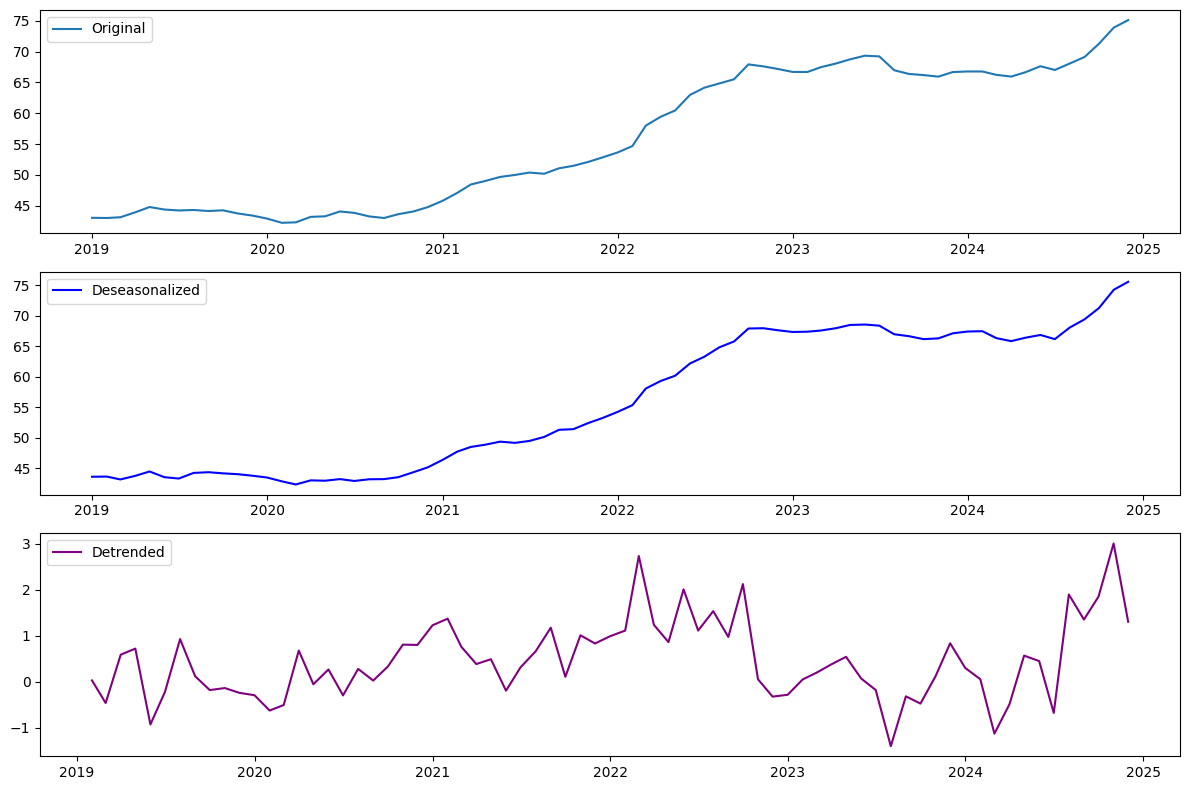

Original  Deseasonalized  Detrended
2019-02-01  42.981560       43.635774   0.024130
2019-03-01  43.102951       43.169190  -0.466584
2019-04-01  43.900826       43.753808   0.584618
2019-05-01  44.765612       44.470035   0.716227
2019-06-01  44.357416       43.537656  -0.932379

In [ ]:
df.iloc[:, 5:] = df.iloc[:, 5:].astype(float)

df_prices = df.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

decomposition = sm.tsa.seasonal_decompose(df_prices, model='additive', period=12)

deseasonalized = df_prices - decomposition.seasonal

detrended = deseasonalized.diff()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()
plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Deseasonalized': deseasonalized, 'Detrended': detrended})
df_result.dropna().head()



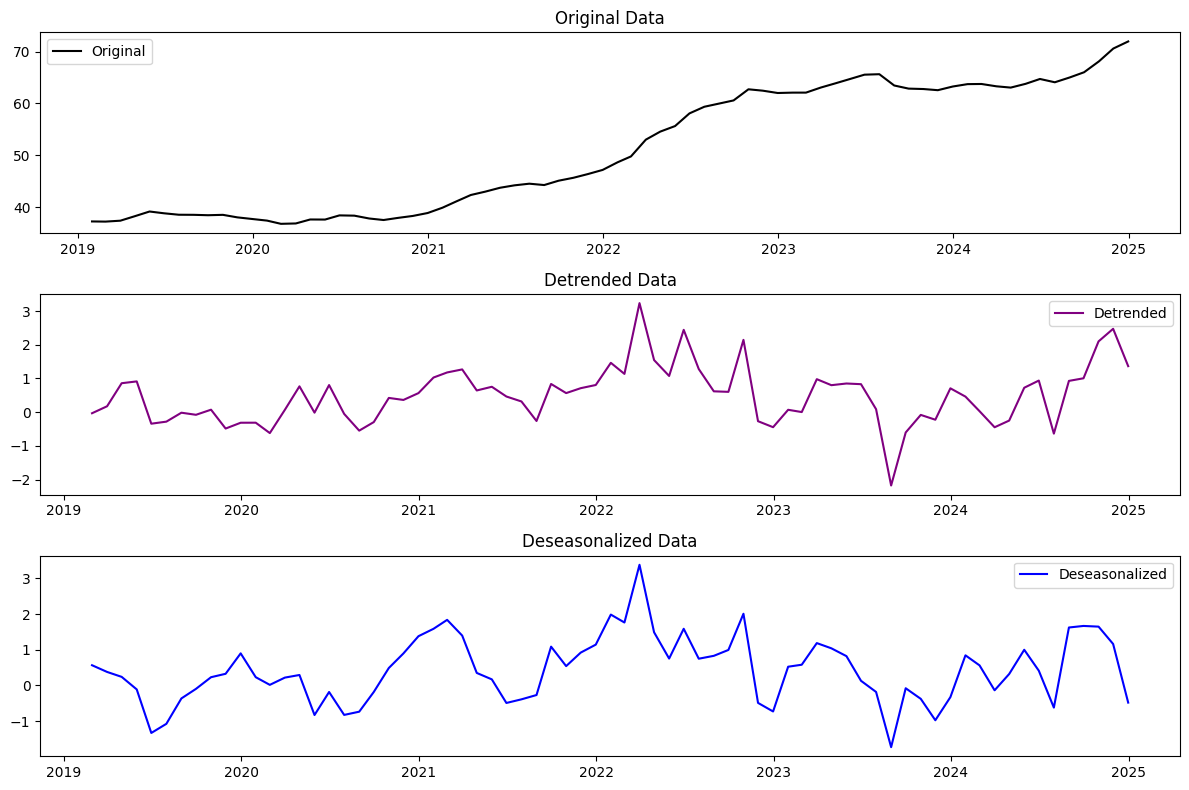

In [ ]:

# df_prices = df[df["–ü–æ–∫–∞–∑–Ω–∏–∫"] == "–°–µ—Ä–µ–¥–Ω—ñ —Å–ø–æ–∂–∏–≤—á—ñ —Ü—ñ–Ω–∏"]

# # –í–∏–¥—ñ–ª–µ–Ω–Ω—è —á–∞—Å–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫
# date_columns = df.columns[5:]  # –ü—Ä–∏–ø—É—Å–∫–∞—î–º–æ, —â–æ –ø–µ—Ä—à—ñ 5 –∫–æ–ª–æ–Ω–æ–∫ ‚Äî –Ω–µ —á–∏—Å–ª–æ–≤—ñ –¥–∞–Ω—ñ

# # –°–µ—Ä–µ–¥–Ω—è —Å–ø–æ–∂–∏–≤—á–∞ —Ü—ñ–Ω–∞ –¥–ª—è –≤—Å—ñ—Ö –ø—Ä–æ–¥—É–∫—Ç—ñ–≤
# df_mean = df_prices[date_columns].mean()

# # –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ —ñ–Ω–¥–µ–∫—Å–∏ —É —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç–∏
# df_mean.index = pd.date_range(start='2019-01', periods=len(df_mean), freq='M')


# stl = STL(df_mean, period=12, seasonal=13)
# res = stl.fit()

detrended = df_mean.diff().dropna()

deseasonalized = detrended - res.seasonal[1:]

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_mean, label="Original", color="black")
plt.legend()
plt.title("Original Data")

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()
plt.title("Detrended Data")

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()
plt.title("Deseasonalized Data")

plt.tight_layout()
plt.show()

In [ ]:
regions = df["–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑"].unique()
regions


array(['–£–∫—Ä–∞—ó–Ω–∞', '–í—ñ–Ω–Ω–∏—Ü—å–∫–∞', '–í–æ–ª–∏–Ω—Å—å–∫–∞', '–î–Ω—ñ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å—å–∫–∞',
       '–î–æ–Ω–µ—Ü—å–∫–∞', '–ñ–∏—Ç–æ–º–∏—Ä—Å—å–∫–∞', '–ó–∞–∫–∞—Ä–ø–∞—Ç—Å—å–∫–∞', '–ó–∞–ø–æ—Ä—ñ–∑—å–∫–∞',
       '–Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞', '–ö–∏—ó–≤—Å—å–∫–∞', '–ö—ñ—Ä–æ–≤–æ–≥—Ä–∞–¥—Å—å–∫–∞', '–õ—É–≥–∞–Ω—Å—å–∫–∞',
       '–õ—å–≤—ñ–≤—Å—å–∫–∞', '–ú–∏–∫–æ–ª–∞—ó–≤—Å—å–∫–∞', '–û–¥–µ—Å—å–∫–∞', '–ü–æ–ª—Ç–∞–≤—Å—å–∫–∞', '–†—ñ–≤–Ω–µ–Ω—Å—å–∫–∞',
       '–°—É–º—Å—å–∫–∞', '–¢–µ—Ä–Ω–æ–ø—ñ–ª—å—Å—å–∫–∞', '–•–∞—Ä–∫—ñ–≤—Å—å–∫–∞', '–•–µ—Ä—Å–æ–Ω—Å—å–∫–∞',
       '–•–º–µ–ª—å–Ω–∏—Ü—å–∫–∞', '–ß–µ—Ä–∫–∞—Å—å–∫–∞', '–ß–µ—Ä–Ω—ñ–≤–µ—Ü—å–∫–∞', '–ß–µ—Ä–Ω—ñ–≥—ñ–≤—Å—å–∫–∞', '–ö–∏—ó–≤'],
      dtype=object)

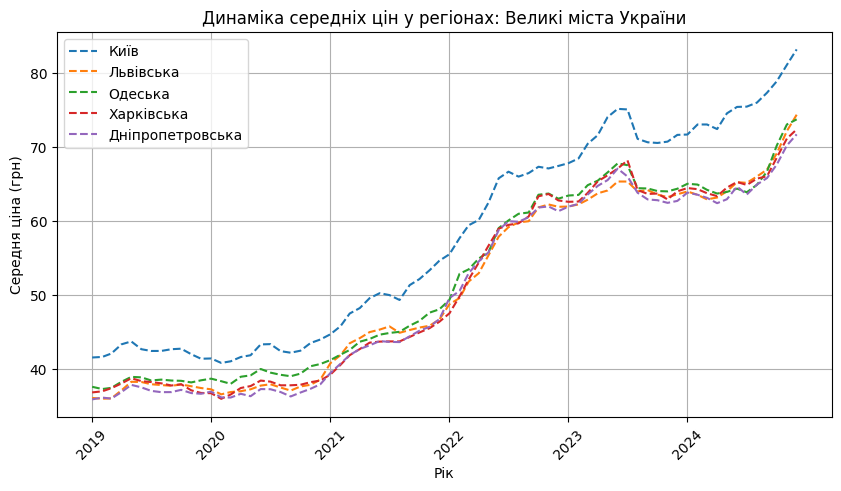


–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ø–æ —Ä–æ–∫–∞—Ö –¥–ª—è: –í–µ–ª–∏–∫—ñ –º—ñ—Å—Ç–∞ –£–∫—Ä–∞—ó–Ω–∏

–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑       –ö–∏—ó–≤  –õ—å–≤—ñ–≤—Å—å–∫–∞    –û–¥–µ—Å—å–∫–∞  –•–∞—Ä–∫—ñ–≤—Å—å–∫–∞  –î–Ω—ñ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å—å–∫–∞
2019                   42.433696  37.408406  38.297428   37.743333         36.860543
2020                   42.379819  37.498225  39.325688   37.656812         36.891848
2021                   49.760399  44.593587  44.708043   43.396449         43.463913
2022                   63.499653  56.787257  58.168750   57.426632         57.314826
2023                   71.411563  63.677708  65.024861   64.519201         63.820243
2024                   75.975903  66.376667  66.539306   66.185903         65.354375


In [ ]:
# Group by region and compute mean prices
def analyze_avg_price_by_region(regions, title):
    filtered_df = df[df["–ü–æ–∫–∞–∑–Ω–∏–∫"] == "–°–µ—Ä–µ–¥–Ω—ñ —Å–ø–æ–∂–∏–≤—á—ñ —Ü—ñ–Ω–∏ –Ω–∞ —Ç–æ–≤–∞—Ä–∏ (–ø–æ—Å–ª—É–≥–∏)"]

    region_prices = filtered_df.groupby("–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑").mean(numeric_only=True)

    region_prices.columns = pd.to_datetime(region_prices.columns, format="%Y-M%m")

    plt.figure(figsize=(10, 5))
    for region in regions:
        if region in region_prices.index:
            plt.plot(region_prices.columns, region_prices.loc[region], linestyle="dashed", label=region)
        else:
            print(f"‚ö†Ô∏è –ü–æ–ø–µ—Ä–µ–¥–∂–µ–Ω–Ω—è: –î–∞–Ω—ñ –¥–ª—è —Ä–µ–≥—ñ–æ–Ω—É '{region}' –≤—ñ–¥—Å—É—Ç–Ω—ñ!")

    plt.xticks(region_prices.columns[::12], labels=region_prices.columns[::12].year, rotation=45)

    plt.title(f"–î–∏–Ω–∞–º—ñ–∫–∞ —Å–µ—Ä–µ–¥–Ω—ñ—Ö —Ü—ñ–Ω —É —Ä–µ–≥—ñ–æ–Ω–∞—Ö: {title}")
    plt.xlabel("–†—ñ–∫")
    plt.ylabel("–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ (–≥—Ä–Ω)")
    plt.legend()
    plt.grid(True)
    plt.show()

    yearly_avg = region_prices.T.resample("Y").mean()
    yearly_avg.index = yearly_avg.index.year

    print(f"\n–û—Ü—ñ–Ω–µ–Ω–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –ø–æ —Ä–æ–∫–∞—Ö –¥–ª—è: {title}\n")
    print(yearly_avg[regions].to_string(index=True, header=True))

analyze_avg_price_by_region(["–ö–∏—ó–≤", "–õ—å–≤—ñ–≤—Å—å–∫–∞", "–û–¥–µ—Å—å–∫–∞", "–•–∞—Ä–∫—ñ–≤—Å—å–∫–∞", "–î–Ω—ñ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å—å–∫–∞"], "–í–µ–ª–∏–∫—ñ –º—ñ—Å—Ç–∞ –£–∫—Ä–∞—ó–Ω–∏")



## Hypotheses under 3.4.1

We can stack all the time series into one dataset:

- Each row = (category, month, CPI)
- Add a group dummy: is_bread = 1 for bread categories, 0 otherwise

Then estimate:
$\mathrm{CPI}_{i t}=\beta_0+\beta_1 \cdot \operatorname{COVID}_t+\beta_2 \cdot \mathrm{War}_t+\beta_3 \cdot \operatorname{Bread}_i+\beta_4 \cdot\left(\operatorname{Bread}_i \times \mathrm{War}_t\right)+\epsilon_{i t}$

This allows us to test whether:

- Bread prices are different from others in general (Œ≤‚ÇÉ)
- Bread prices responded differently to war (Œ≤‚ÇÑ ‚Äî the interaction term)


In [44]:
df_grouped = pd.read_csv("grouped_bread.csv")
df_grouped = df_grouped.drop(columns=["Unnamed: 0", "2019", "2020", "2021", "2022", "2023", "2024"])
time_columns = [col for col in df_grouped.columns if "-M" in col]

df_long = df_grouped.melt(
    id_vars=["–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑", "–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥"],
    value_vars=time_columns,
    var_name="Date",
    value_name="CPI"
)

df_long["Date"] = df_long["Date"].str.replace(r"-M", "-", regex=True)
df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m")
df_long["is_bread"] = df_long["–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥"].str.lower().str.contains("—Ö–ª—ñ–±").astype(int)
df_long["covid"] = (df_long["Date"] >= pd.to_datetime("2020-03-01")).astype(int)
df_long["war"] = (df_long["Date"] >= pd.to_datetime("2022-02-01")).astype(int)
df_long["bread_war_interact"] = df_long["is_bread"] * df_long["war"]
df_long.head()


–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑             –¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥       Date     CPI  \
0     –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞                         –ö–∞—Ä—Ç–æ–ø–ª—è 2019-01-01    7.67   
1     –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞                  –ö–æ–≤–±–∞—Å–Ω—ñ –≤–∏—Ä–æ–±–∏ 2019-01-01   73.94   
2     –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞                            –ö—Ä—É–ø–∏ 2019-01-01   18.87   
3     –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞  –ú º—è—Å–æ —Å–≤—ñ–π—Å—å–∫–∏—Ö —Ç–≤–∞—Ä–∏–Ω —Ç–∞ –ø—Ç–∏—Ü—ñ 2019-01-01  101.58   
4     –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞                         –ú–∞–∫–∞—Ä–æ–Ω–∏ 2019-01-01   17.80   

   is_bread  covid  war  bread_war_interact  
0         0      0    0                   0  
1         0      0    0                   0  
2         0      0    0                   0  
3         0      0    0                   0  
4         0      0    0                   0

In [45]:
X = sm.add_constant(df_long[["covid", "war", "is_bread", "bread_war_interact"]])
y = df_long["CPI"]
model = sm.OLS(y, X).fit()
summary_table = model.summary2().tables[1]
print(summary_table)

                        Coef.  Std.Err.          t         P>|t|     [0.025  \
const               41.757722  0.639534  65.293977  0.000000e+00  40.504205   
covid                5.005228  0.800405   6.253370  4.073911e-10   3.436396   
war                 25.847570  0.647383  39.926272  0.000000e+00  24.578669   
is_bread           -24.156512  1.556192 -15.522837  4.052908e-54 -27.206721   
bread_war_interact -15.187052  2.216018  -6.853307  7.363243e-12 -19.530553   

                       0.975]  
const               43.011239  
covid                6.574059  
war                 27.116470  
is_bread           -21.106302  
bread_war_interact -10.843552  


#### Results:
- Significant CPI increase after March 2020
- Strong CPI surge after Feb 2022 for all items
- Bread is significantly cheaper on average
- Bread prices rose less than others during the war

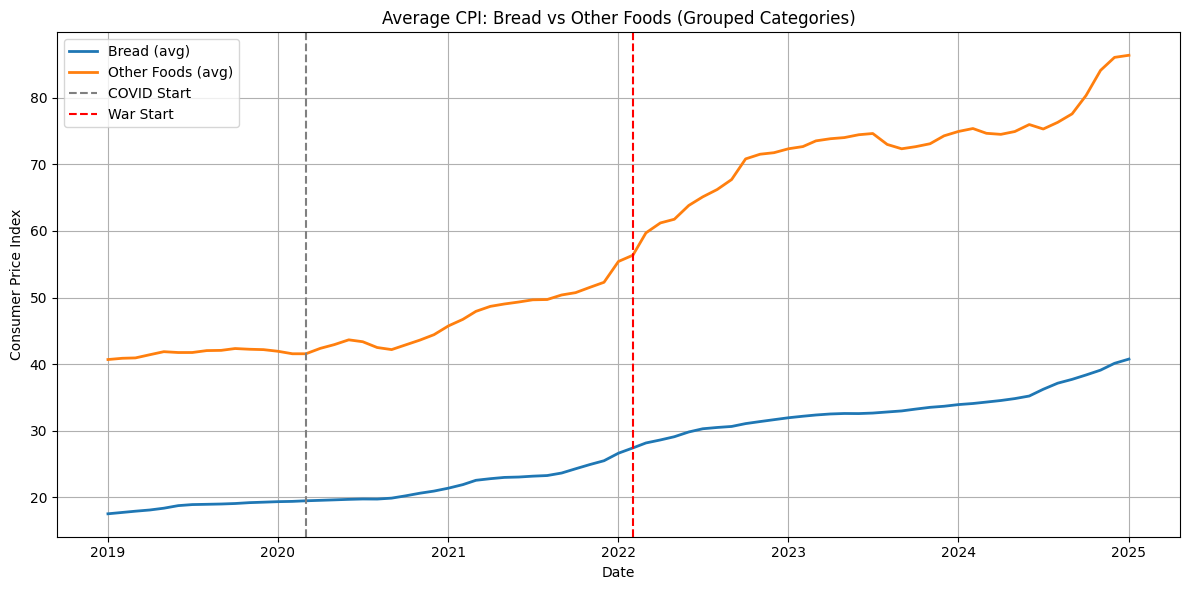

In [46]:
avg_cpi = df_long.groupby(["Date", "is_bread"])["CPI"].mean().unstack()

plt.figure(figsize=(12, 6))
plt.plot(avg_cpi.index, avg_cpi[1.0], label="Bread (avg)", linewidth=2)
plt.plot(avg_cpi.index, avg_cpi[0.0], label="Other Foods (avg)", linewidth=2)

# Mark events
plt.axvline(pd.to_datetime("2020-03-01"), color='gray', linestyle='--', label="COVID Start")
plt.axvline(pd.to_datetime("2022-02-01"), color='red', linestyle='--', label="War Start")

plt.title("Average CPI: Bread vs Other Foods (Grouped Categories)")
plt.xlabel("Date")
plt.ylabel("Consumer Price Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Report:

The pooled regression confirms that although all food categories saw price inflation during COVID-19 and the full-scale war, bread products experienced a significantly smaller increase. This is visible in both the coefficient on the Bread √ó War interaction term (‚àí15.2, p < 0.001) and in the CPI trend plot, which shows a gradual but consistent rise in bread prices compared to the more volatile and pronounced surge in other foods.

Thus, Hypothesis 3.4.1 (2) is partially supported: bread did undergo a sustained price transformation, but not one more pronounced than other food groups.

## Hypothesis 3.4.1 (2)
Wheat and grain prices will demonstrate the most substantial price volatility due to disrupted agricultural production and export challenges.

1. We compute monthly price changes:
$$
\Delta \mathrm{CPI}_{i, t}=\mathrm{CPI}_{i, t}-\mathrm{CPI}_{i, t-1}
$$
2. We proceed with standard deviation of changes (volatility)
$$
\sigma_i=\operatorname{std}\left(\Delta \mathrm{CPI}_{i, t}\right)
$$
This metric quantifies volatility ‚Äî higher values indicate more unstable pricing over time.

In [47]:
cpi_wide = df_long.pivot_table(index="Date", columns="–¢–∏–ø —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –ø–æ—Å–ª—É–≥", values="CPI")

# Step 1: Compute monthly CPI change (delta)
cpi_change = cpi_wide.diff()
# Step 2: Compute standard deviation of these changes = volatility
volatility = cpi_change.std().sort_values(ascending=False)

grain_volatility = volatility["–ö—Ä—É–ø–∏"]
rank = (volatility > grain_volatility).sum() + 1  # 1-based ranking
vol_df = pd.DataFrame({
    "Category": volatility.index,
    "Volatility (œÉ)": volatility.values,
    "Rank": range(1, len(volatility) + 1)
})
vol_df.loc[vol_df["Category"] == "–ö—Ä—É–ø–∏", "Rank"] = rank

print(vol_df)


                                         Category  Volatility (œÉ)  Rank
0                                            –Ø–π—Ü—è        5.341067     1
1                                           –û–≤–æ—á—ñ        3.515339     2
2                                          –Ø–±–ª—É–∫–∞        2.843574     3
3                                            –†–∏–±–∞        2.552754     4
4                                 –ö–æ–≤–±–∞—Å–Ω—ñ –≤–∏—Ä–æ–±–∏        2.333399     5
5                                        –ö–∞—Ä—Ç–æ–ø–ª—è        2.333206     6
6                                             –°–∏—Ä        2.070725     7
7                 –ú º—è—Å–æ —Å–≤—ñ–π—Å—å–∫–∏—Ö —Ç–≤–∞—Ä–∏–Ω —Ç–∞ –ø—Ç–∏—Ü—ñ        1.714776     8
8                                –û–ª—ñ—è —Å–æ–Ω—è—à–Ω–∏–∫–æ–≤–∞        1.536723     9
9                                –ú–æ–ª–æ—á–Ω—ñ –ø—Ä–æ–¥—É–∫—Ç–∏        1.138488    10
10                                          –ö—Ä—É–ø–∏        1.056463    11
11                           

## Result

Findings:
- –ö—Ä—É–ø–∏ (grains) had a volatility of ùúé = 1,05
- They ranked 11th out of 15 categories.

Higher volatility was observed in –Ø–π—Ü—è (eggs), –û–≤–æ—á—ñ (vegetables), and –Ø–±–ª—É–∫–∞ (apples).

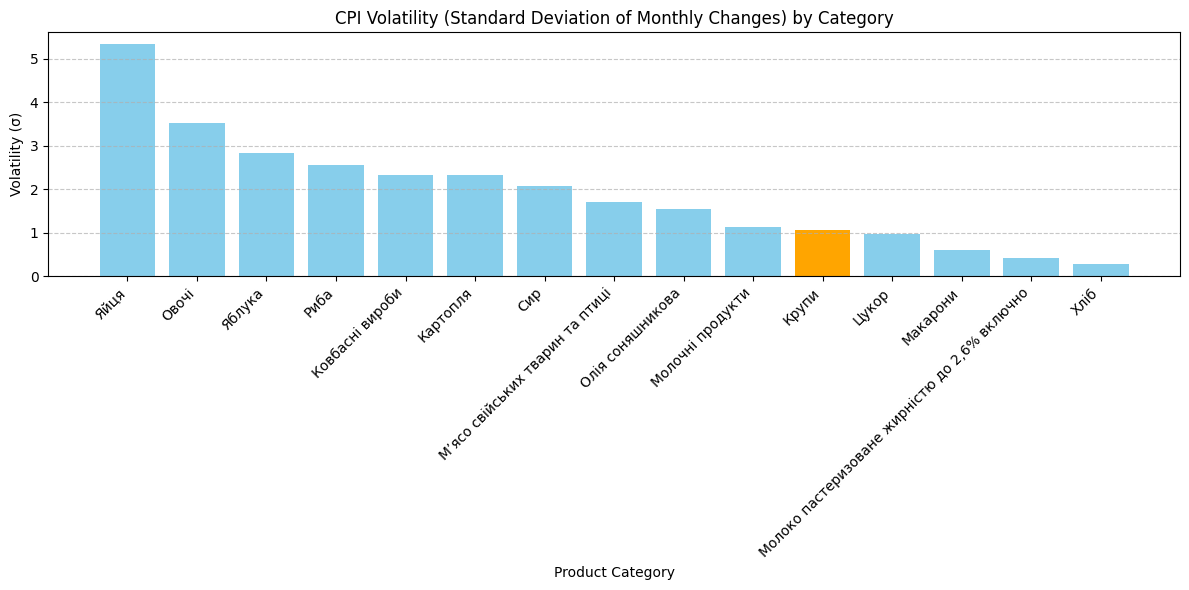

In [48]:
plt.figure(figsize=(12, 6))
bars = plt.bar(volatility.index, volatility.values, color=["orange" if cat == "–ö—Ä—É–ø–∏" else "skyblue" for cat in volatility.index])

for bar in bars:
    if bar.get_label() == "–ö—Ä—É–ø–∏" or bar.get_x() == volatility.index.get_loc("–ö—Ä—É–ø–∏"):
        bar.set_color("orange")
        plt.text(bar.get_x(), bar.get_height() + 0.1, "–ö—Ä—É–ø–∏", ha='center', va='bottom', fontweight='bold')

plt.title("CPI Volatility (Standard Deviation of Monthly Changes) by Category")
plt.ylabel("Volatility (œÉ)")
plt.xlabel("Product Category")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Report:

While grain prices showed moderate volatility, they were not the most volatile. Therefore, the hypothesis is not supported in this dataset. Products like eggs and fresh produce exhibited more significant pricing fluctuations, likely due to perishability and seasonal factors.

## Hypothesis 3.4.2

Food price inflation will demonstrate significant regional disparities.

Sub-claims:
- Border/conflict zones ‚Üí more extreme price changes
- Agricultural regions ‚Üí more stable pricing

Conflict Zones:
- –î–æ–Ω–µ—Ü—å–∫–∞
- –õ—É–≥–∞–Ω—Å—å–∫–∞
- –•–∞—Ä–∫—ñ–≤—Å—å–∫–∞
- –•–µ—Ä—Å–æ–Ω—Å—å–∫–∞
- –ó–∞–ø–æ—Ä—ñ–∑—å–∫–∞

Agricultural Strongholds:
- –î–Ω—ñ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å—å–∫–∞
- –ö—ñ—Ä–æ–≤–æ–≥—Ä–∞–¥—Å—å–∫–∞
- –û–¥–µ—Å—å–∫–∞
- –í—ñ–Ω–Ω–∏—Ü—å–∫–∞
- –•–∞—Ä–∫—ñ–≤—Å—å–∫–∞

We'll now compute for each region:
1. Inflation rate:
$$
\text { Inflation }_r=\frac{\mathrm{CPI}_{r, \text { end }}-\mathrm{CPI}_{r, \text { start }}}{\mathrm{CPI}_{r, \text { start }}}
$$
2. Volatility:
$$
\sigma_r=\operatorname{std}\left(\Delta \mathrm{CPI}_{r, t}\right)
$$

And then:
- Compare conflict zones vs others
- Compare agricultural strongholds vs others

In [49]:
df_regions = df_long[df_long["–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑"] != "–£–∫—Ä–∞—ó–Ω–∞"]
cpi_region = df_regions.groupby(["Date", "–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑"])["CPI"].mean().unstack()

start_cpi = cpi_region.iloc[0]
end_cpi = cpi_region.iloc[-1]
inflation_rate = ((end_cpi - start_cpi) / start_cpi) * 100
volatility = cpi_region.diff().std()

region_stats = pd.DataFrame({
    "Inflation (%)": inflation_rate,
    "Volatility (œÉ)": volatility
}).reset_index().rename(columns={"–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑": "Region"})

# Tag conflict and agricultural zones
conflict_regions = ["–î–æ–Ω–µ—Ü—å–∫–∞", "–õ—É–≥–∞–Ω—Å—å–∫–∞", "–•–∞—Ä–∫—ñ–≤—Å—å–∫–∞", "–•–µ—Ä—Å–æ–Ω—Å—å–∫–∞", "–ó–∞–ø–æ—Ä—ñ–∑—å–∫–∞"]
agri_regions = ["–î–Ω—ñ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å—å–∫–∞", "–ö—ñ—Ä–æ–≤–æ–≥—Ä–∞–¥—Å—å–∫–∞", "–û–¥–µ—Å—å–∫–∞", "–í—ñ–Ω–Ω–∏—Ü—å–∫–∞", "–•–∞—Ä–∫—ñ–≤—Å—å–∫–∞"]

region_stats["Conflict Zone"] = region_stats["Region"].isin(conflict_regions)
region_stats["Agricultural Zone"] = region_stats["Region"].isin(agri_regions)

print(region_stats)


               Region  Inflation (%)  Volatility (œÉ)  Conflict Zone  \
0   –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫–∞     115.172748        0.906824          False   
1           –í–æ–ª–∏–Ω—Å—å–∫–∞     132.218133        1.180827          False   
2           –í—ñ–Ω–Ω–∏—Ü—å–∫–∞     129.583840        1.088075          False   
3    –î–Ω—ñ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å—å–∫–∞     120.779446        1.075113          False   
4            –î–æ–Ω–µ—Ü—å–∫–∞      54.712284        1.014510           True   
5         –ñ–∏—Ç–æ–º–∏—Ä—Å—å–∫–∞     115.514358        1.043175          False   
6        –ó–∞–∫–∞—Ä–ø–∞—Ç—Å—å–∫–∞     118.244110        0.991727          False   
7          –ó–∞–ø–æ—Ä—ñ–∑—å–∫–∞     130.441770        1.225120           True   
8                –ö–∏—ó–≤     117.451856        1.128493          False   
9            –ö–∏—ó–≤—Å—å–∫–∞     114.647960        1.151342          False   
10     –ö—ñ—Ä–æ–≤–æ–≥—Ä–∞–¥—Å—å–∫–∞     112.122087        0.949107          False   
11          –õ—É–≥–∞–Ω—Å—å–∫–∞

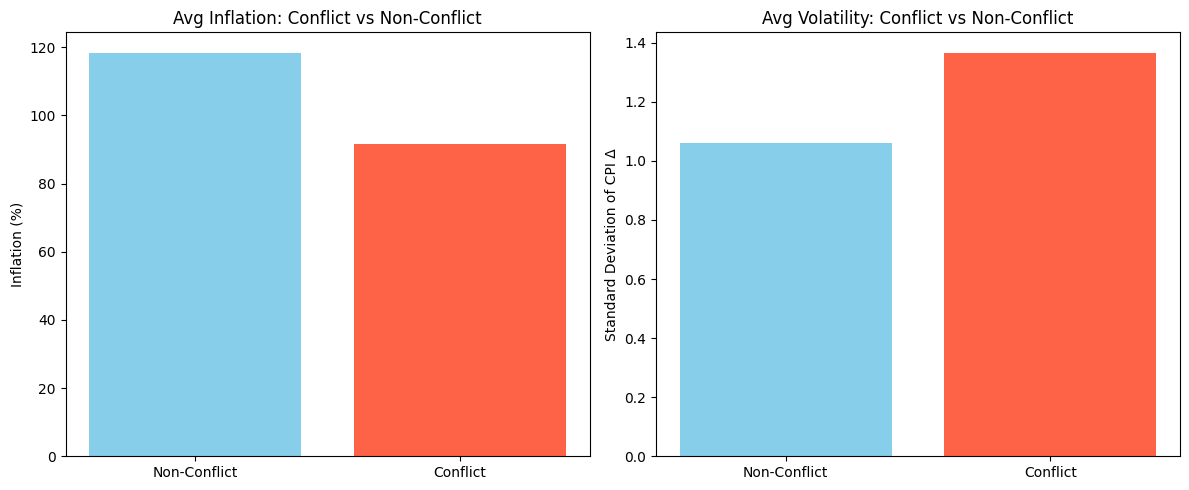

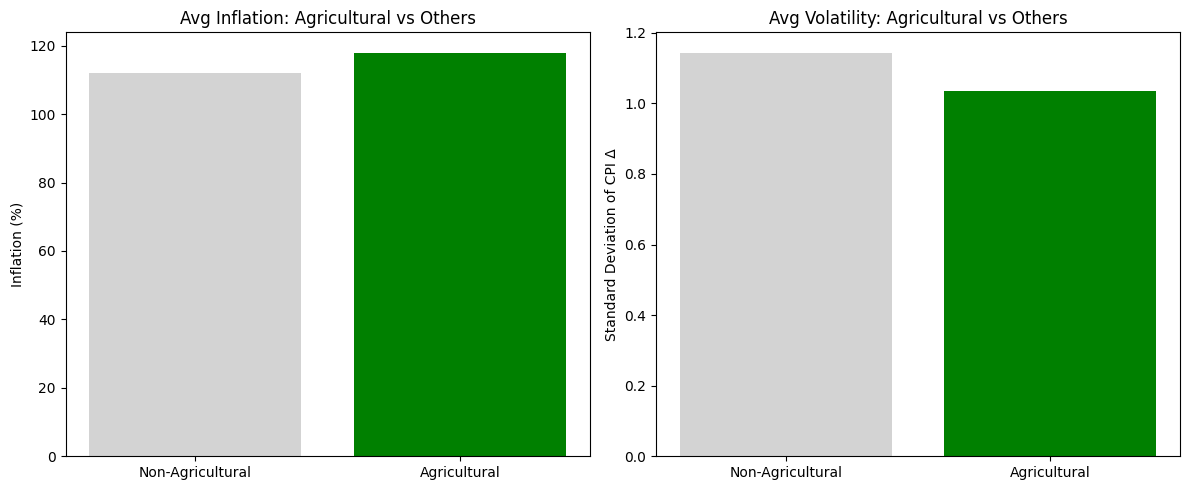

In [50]:
group_means = region_stats.groupby("Conflict Zone")[["Inflation (%)", "Volatility (œÉ)"]].mean()
group_agri = region_stats.groupby("Agricultural Zone")[["Inflation (%)", "Volatility (œÉ)"]].mean()

# Step 2: Plot Conflict vs Non-Conflict
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(["Non-Conflict", "Conflict"], group_means["Inflation (%)"], color=["skyblue", "tomato"])
plt.title("Avg Inflation: Conflict vs Non-Conflict")
plt.ylabel("Inflation (%)")

plt.subplot(1, 2, 2)
plt.bar(["Non-Conflict", "Conflict"], group_means["Volatility (œÉ)"], color=["skyblue", "tomato"])
plt.title("Avg Volatility: Conflict vs Non-Conflict")
plt.ylabel("Standard Deviation of CPI Œî")

plt.tight_layout()
plt.show()

# Step 3: Plot Agri vs Non-Agri
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(["Non-Agricultural", "Agricultural"], group_agri["Inflation (%)"], color=["lightgray", "green"])
plt.title("Avg Inflation: Agricultural vs Others")
plt.ylabel("Inflation (%)")

plt.subplot(1, 2, 2)
plt.bar(["Non-Agricultural", "Agricultural"], group_agri["Volatility (œÉ)"], color=["lightgray", "green"])
plt.title("Avg Volatility: Agricultural vs Others")
plt.ylabel("Standard Deviation of CPI Œî")

plt.tight_layout()
plt.show()

## Results

- Inflation is lower in conflict zones
‚Üí likely due to missing data, limited supply, or market distortions
- Volatility is higher in conflict zones
‚Üí confirms price instability and irregular fluctuations

Supports sub-claim:
Conflict zones experienced more volatile food pricing

- Inflation is slightly lower in agricultural regions
- Volatility is also slightly lower

Supports sub-claim (b):
Local production may have contributed to price stability

## Regressive analysis

We'll estimate:
$$
\mathrm{CPI}_{r, t}=\beta_0+\beta_1 \cdot \text { Conflict }_r+\beta_2 \cdot \text { Agricultural }_r+\beta_3 \cdot \mathrm{War}_t+\epsilon_{r, t}
$$

This allows us to test:
- Is CPI systematically higher or lower in conflict or agricultural zones?
- Does war timing impact CPI uniformly?

In [51]:
reg_data = df_regions.groupby(["Date", "–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑"]).agg(CPI=("CPI", "mean")).reset_index()

# Merge conflict/agricultural tags
tags = region_stats[["Region", "Conflict Zone", "Agricultural Zone"]]
reg_data = reg_data.merge(tags, left_on="–¢–µ—Ä–∏—Ç–æ—Ä—ñ–∞–ª—å–Ω–∏–π —Ä–æ–∑—Ä—ñ–∑", right_on="Region", how="left")
reg_data["war"] = (reg_data["Date"] >= pd.to_datetime("2022-02-01")).astype(int)

X = reg_data[["Conflict Zone", "Agricultural Zone", "war"]].astype(float)
X = sm.add_constant(X)
y = reg_data["CPI"]

model = sm.OLS(y, X).fit()
summary_table = model.summary2().tables[1]
print(summary_table)

                       Coef.  Std.Err.           t     P>|t|     [0.025  \
const              43.289077  0.243482  177.791538  0.000000  42.811543   
Conflict Zone      -0.562295  0.387077   -1.452669  0.146488  -1.321457   
Agricultural Zone   0.287684  0.387077    0.743223  0.457443  -0.471477   
war                26.686338  0.309691   86.170912  0.000000  26.078952   

                      0.975]  
const              43.766611  
Conflict Zone       0.196867  
Agricultural Zone   1.046846  
war                27.293725  


## Report

To validate regional disparities in food price inflation, we estimated a pooled regression with the following specification:
$$
\mathrm{CPI}_{r, t}=\beta_0+\beta_1 \cdot \text { Conflict }_r+\beta_2 \cdot \text { Agricultural }_r+\beta_3 \cdot \mathrm{War}_t+\epsilon_{r, t}
$$

Results confirm a strong CPI shift post-war ( $\beta_3=+26.69, p<0.001$ ), but do not find statistically significant average differences between conflict or agricultural zones across the entire time frame. However, earlier volatility and inflation metrics did show group-level patterns, suggesting that while level differences are small, dynamics differ across regions.

Thus, Hypothesis 3.4.2 is partially supported: regional disparities in food prices exist, but manifest more clearly in volatility and local shocks than in absolute price levels.